# Data Cleaning Practices



In this lab, we will apply learned concepts from Day 1-2 lectures to perform data cleaning on a given Airbnb data set. 

This dataset (raw.csv) contains 30k+ records on hotels in the top-10 tourist destinations and major US metropolitan areas sraped from Airbnb.com. 
Each data record has 40 attributes including the number of bedrooms, price, location, etc. 
The attribute "pop2016" means population of the zipcode location (area) in year 2016.
Demographic and economic attributes were scraped from city-data.com. 

Updated: short description for attributes:

## House specific features, collected from Airbnb.com:
Bathrooms: The number of bathrooms in the listing
Bedrooms: The number of bedrooms
Beds: The number of bed(s)
LocationName: Location of the house
NumGuests: Maximum number of guests can hold
NumReviews: number of reviews received
Price: daily price in local currency
# Rating: Y/N - whether the rating of each house is 5 or not
latitude: location information latitude
longitude: location information longitude
zipcode: zipcode of the house

## demographic and economic attributes based on zipcode, collected from city-data.com (means the same zipcode should share the same value for each of the following attributes)
pop2016: popularity of the area reported in 2016
pop2010: popularity of the area reported in 2010
pop2000: popularity of the area reported in 2000
cost_living_index: a U.S standarded index for cost living measurement
land_area: space of land
water_area: space of water area
pop_density: density of population 
number of males: within the area population
number of females: within the area population
prop taxes paid 2016: Median real estate property taxes paid for housing units in 2016
median taxes: median of taxes paid by house owners in the area
median house value: median of house value in the area
median household income: median of income of house owners in the area
median monthly onwer costs (with mortgage): median monthly cost of house owner including mortgage
median monthly onwer costs (no mortgage): median monthly cost of house owner without considering mortgage
median gross rent: the monthly rent agreed or contracted for plus the estimated monthly cost of utilities and fuels.
median asking price for vacant for-sale home/condo: median asking price for for-sale home in the area
unemployment: umemployment ratio of the area

## aggregated features for Abnb by zipcode 
Number of Homes	Count of Abnb:	number of Abnb houses in this area
Density of Abnb (%): ratio of Abnb houses in this area
Average Abnb Price (by zipcode): aggregated by zipcode
Average NumReviews (by zipcode): aggregated by zipcode	
Average Rating (by zipcode): aggregated by zipcode
Average Number of Bathrooms (by zipcode): aggregated by zipcode
Average Number of Bedrooms (by zipcode): aggregated by zipcode
Average Number of Beds (by zipcode): aggregated by zipcode
Average Number of Guests (by zipcode): aggregated by zipcode



The prediction label is Rating of house.

## Submission: submit via onq. 


#Import Libraries

In [197]:
# Step 1: Import needed libraries. E.g., pandas, missingno, and sklearn
import pandas as pd
import numpy as np
#for plots
import missingno as msno 
import seaborn as sns
import matplotlib.pyplot as plt
from IPython import get_ipython
get_ipython().run_line_magic('matplotlib', 'inline')

from sklearn.preprocessing import LabelEncoder  #for encode the categorical data

from sklearn.experimental import enable_iterative_imputer
from sklearn.impute import IterativeImputer, SimpleImputer
from sklearn.impute import KNNImputer

#split the data
from sklearn.model_selection import train_test_split

#models Evaluations and reports
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report
from sklearn.metrics import roc_curve
from sklearn.metrics import auc
from sklearn.metrics import roc_auc_score
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import cross_val_score, KFold

#ML models 
from xgboost import XGBClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier

#Task 1: Read dataset and perform basic data exploration. Specially, you should write code to explore the types of data provided

In [25]:
#load the data from my google drive
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


##Read the data

In [26]:
# TODO for Task 1, put your code here to perform data type and data scale check
# Load dataset
df = pd.read_csv("/content/drive/MyDrive/DEBI/Queens/DA/Lab_1/raw.csv")

# check the first five rows of the training data
df

,Bathrooms,Bedrooms,Beds,LocationName,NumGuests,NumReviews,Price,Rating,latitude,longitude,...,Number of Homes,Count of Abnb,Density of Abnb (%),Average Abnb Price (by zipcode),Average NumReviews (by zipcode),Average Rating (by zipcode),Average Number of Bathrooms (by zipcode),Average Number of Bedrooms (by zipcode),Average Number of Beds (by zipcode),Average Number of Guests (by zipcode)
0,1.0,1.0,1.0,Atlanta,2.0,7.0,38.0,Y,33.75515,-84.32992,...,5306.0,75,1.413494,104.743243,35.280702,4.944444,1.459459,1.845070,2.146667,2.146667
1,1.0,1.0,1.0,Atlanta,2.0,15.0,38.0,N,33.82613,-84.33963,...,10537.2,96,0.911058,103.673684,21.169231,4.847458,1.281250,1.473118,1.687500,1.687500
2,2.0,2.0,2.0,Atlanta,4.0,17.0,100.0,Y,33.75076,-84.37058,...,9114.4,200,2.194330,119.368687,40.400000,4.937500,1.375000,1.602094,1.925000,1.925000
3,1.0,1.0,1.0,Atlanta,2.0,304.0,78.0,Y,33.77059,-84.33538,...,7808.0,130,1.664959,119.914729,44.063158,4.892857,1.292308,1.603306,1.953846,1.953846
4,1.0,1.0,1.0,Atlanta,2.0,19.0,50.0,Y,33.79030,-84.40027,...,9343.6,190,2.033477,131.058511,28.444444,4.881679,1.326316,1.580838,1.968421,1.968421
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
33140,1.0,1.0,2.0,Washington,5.0,159.0,67.0,N,38.90956,-77.03107,...,5300.0,123,2.320755,135.268293,52.009174,4.800000,1.262295,1.453704,2.203252,2.203252
33141,2.0,1.0,4.0,Washington,1.0,28.0,49.0,Y,38.90920,-77.02622,...,5300.0,123,2.320755,135.268293,52.009174,4.800000,1.262295,1.453704,2.203252,2.203252
33142,1.0,1.0,1.0,Washington,2.0,106.0,120.0,Y,38.88746,-76.99119,...,11794.8,410,3.476108,127.748768,54.344444,4.900289,1.196078,1.442708,2.487805,2.487805
33143,1.0,1.0,2.0,Washington,3.0,296.0,70.0,Y,38.88535,-76.98183,...,11794.8,410,3.476108,127.748768,54.344444,4.900289,1.196078,1.442708,2.487805,2.487805


> As we see we have
  *  33145 records
  *  39 features
  *  1 target `[Y, N]`

##Data Information and the types of data

In [27]:
# summary of the data including non-null counts
print('data information: \n')
df.info()

data information: 

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 33145 entries, 0 to 33144
Data columns (total 40 columns):
 #   Column                                              Non-Null Count  Dtype  
---  ------                                              --------------  -----  
 0   Bathrooms                                           32697 non-null  float64
 1   Bedrooms                                            29818 non-null  float64
 2   Beds                                                32831 non-null  float64
 3   LocationName                                        32826 non-null  object 
 4   NumGuests                                           32831 non-null  float64
 5   NumReviews                                          32829 non-null  float64
 6   Price                                               32507 non-null  float64
 7   Rating                                              33145 non-null  object 
 8   latitude                                            3314

> As we see we have only 3 types of data 
  * `float64`
  * `int64`
  * `object`

#Task 2: Data quality check, does duplicate entries exit in this table? Do they have consistent values? Briefely explain your methodology and your findings within this markdown cell, and write corresponding code in the next code cell.


In [28]:
# TODO for Task 2.1 ==>does duplicate entries exit in this table?
## using the DataFrame.duplicated() method to return a series of boolean values [True , False] for each row
df.duplicated(subset = None)

0        False
1        False
2        False
3        False
4        False
         ...  
33140    False
33141    False
33142    False
33143    False
33144    False
Length: 33145, dtype: bool

In [29]:
#check if there exist anu true value to check for duplications
df.duplicated(subset = None).value_counts()

False    28891
True      4254
dtype: int64

> As we see we have 2 unique values `[True, False]` so for this question:

>does duplicate entries exit in this table?
 * yes we have duplicates entries exist because the results of duplicate.value_counts() we will see that there are **`'4254'  True`** results which mean there are duplication

In [30]:
# TODO for Task 2.2 ==>Do they have consistent values?
#checking for duplications
# use the DataFrame.duplicated() method to return a series of boolean values for each rows then but apply the results on the data frame to return all the duplicates rows
df_duplication = df[df.duplicated(subset = None)]
#sort the dataframe to see if there are more than one record have the same value for each column
df_duplication = df_duplication.sort_values(by=list(df_duplication.columns))
df_duplication

,Bathrooms,Bedrooms,Beds,LocationName,NumGuests,NumReviews,Price,Rating,latitude,longitude,...,Number of Homes,Count of Abnb,Density of Abnb (%),Average Abnb Price (by zipcode),Average NumReviews (by zipcode),Average Rating (by zipcode),Average Number of Bathrooms (by zipcode),Average Number of Bedrooms (by zipcode),Average Number of Beds (by zipcode),Average Number of Guests (by zipcode)
22257,0.0,1.0,1.0,Oakland,2.0,11.0,53.0,N,37.80852,-122.29317,...,1253.6,4143,330.488194,117.697403,43.552975,4.837386,1.189232,1.461605,1.775992,1.775992
24789,0.0,1.0,1.0,San Francisco,1.0,5.0,99.0,N,37.78654,-122.41469,...,11895.6,226,1.899862,155.077273,63.411765,4.731707,1.426606,1.230769,1.586364,1.586364
26494,0.0,1.0,1.0,San Francisco,1.0,5.0,99.0,N,37.78654,-122.41469,...,11895.6,226,1.899862,155.077273,63.411765,4.731707,1.426606,1.230769,1.586364,1.586364
23323,0.0,1.0,1.0,San Francisco,1.0,42.0,38.0,Y,37.79325,-122.40326,...,198.4,43,21.673387,79.871795,115.153846,4.593023,0.391304,1.000000,1.051282,1.051282
25554,0.0,1.0,1.0,San Francisco,1.0,42.0,38.0,Y,37.79325,-122.40326,...,198.4,43,21.673387,79.871795,115.153846,4.593023,0.391304,1.000000,1.051282,1.051282
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
24747,NaN,1.0,2.0,San Francisco,2.0,6.0,150.0,N,37.78307,-122.46075,...,16903.6,172,1.017535,198.958333,71.309677,4.829032,1.299401,1.533333,2.029586,2.029586
5266,NaN,2.0,3.0,New Orleans,6.0,118.0,50.0,Y,30.02173,-90.05472,...,14921.2,494,3.310726,117.917355,38.602771,4.911330,1.374745,2.138004,2.684211,2.684211
31578,NaN,NaN,1.0,Arlington,1.0,8.0,25.0,N,38.89718,-77.09271,...,10717.2,1265,11.803456,168.866129,31.233509,4.787722,1.254358,1.434460,1.716996,1.716996
21896,NaN,NaN,1.0,Berkeley,1.0,24.0,65.0,N,37.85471,-122.26309,...,1253.6,4143,330.488194,117.697403,43.552975,4.837386,1.189232,1.461605,1.775992,1.775992


In [31]:
#take a sample to check if this two records have the same values for all columns
print((df_duplication.loc[24789] == df_duplication.loc[26494]).unique())

[ True]


> Do they have consistent values?

> **Ans.:** yes they have, As we see from the previous cell when i check the consistent of this two record i get **`True`** Value as a result so there are consistent values

In [32]:
#checking for number of duplications
df.duplicated().sum()

4254

> As we see we have 4254 duplicated value

In [33]:
#remove all duplicate values except the first one
df.drop_duplicates(subset=None, keep='first', inplace=True)
df.duplicated().sum()

0

#Task 3: Data quality check, write code and answer:
* 3.1 does missing value exit in the table? 
* 3.2 Where are the missing data? 
* 3.3 How much data is missing?
* 3.4 Are there any variables often missing together？

You can use missingno library to generate plots to support your claim. 
Summarize your findings for task 3 in this markdown cell and write corresponding code in the next code cell.

###3.1 does missing value exit in the table?

In [34]:
# TODO for Task 3.1==>does missing value exit in the table?
df.isna().any()

Bathrooms                                              True
Bedrooms                                               True
Beds                                                   True
LocationName                                           True
NumGuests                                              True
NumReviews                                             True
Price                                                  True
Rating                                                False
latitude                                              False
longitude                                             False
zipcode                                               False
pop2016                                                True
pop2010                                                True
pop2000                                               False
cost_living_index (US avg. = 100)                      True
land_area (sq.mi.)                                    False
water_area (sq.mi.)                     

> does missing value exit in the table?
  * yes there are.

> As we see from the results in the previous cell when we used `df.isna().any()` there are True Values Which mean there are missing values 

###3.2 Where are the missing data?

In [35]:
# TODO for Task 3.2==>Where are the missing data?
# summary of the number of nulls and count the ratio of missing values
total_miss = df.isnull().sum()
percent_miss = (total_miss/df.isnull().count()*100)

# sort attributes by missing value ratio
missing_data = pd.DataFrame({'Total missing':total_miss,'% missing':percent_miss})
print("the shape of the missing data frame: ", missing_data.shape)
missing_data.sort_values(by='Total missing',ascending=False)

the shape of the missing data frame:  (40, 2)


,Total missing,% missing
Bedrooms,2942,10.183102
median taxes (with mortgage,2632,9.110103
median taxes (no mortgage),2540,8.791665
median monthly owner costs (no mortgage),2507,8.677443
median monthly owner costs (with mortgage),2374,8.217092
median house value,2363,8.179018
Price,627,2.170226
Bathrooms,417,1.443356
LocationName,319,1.104150
NumReviews,315,1.090305


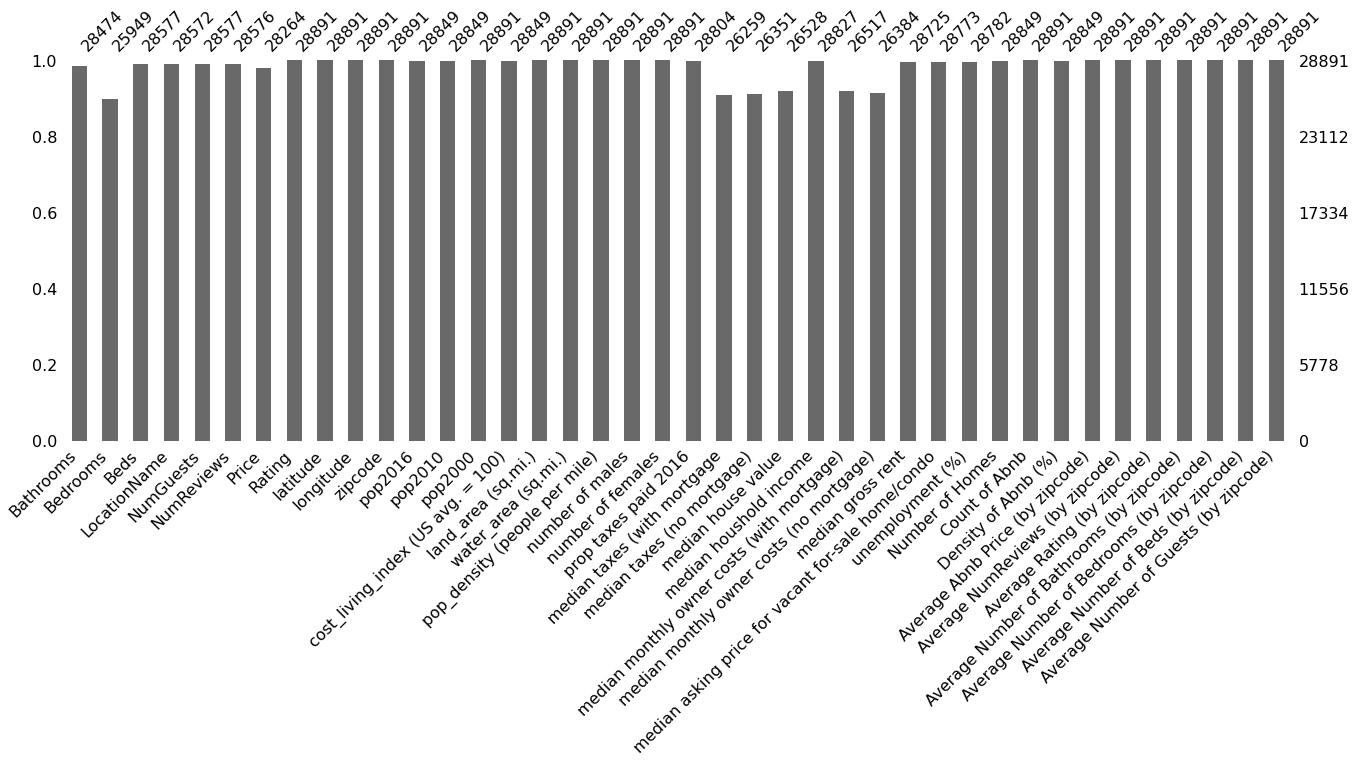

In [36]:
# TODO for Task 3.3==>Where are the missing data?, #3.3 How much data is missing?
#bar chart
msno.bar(df, figsize=(22,7))

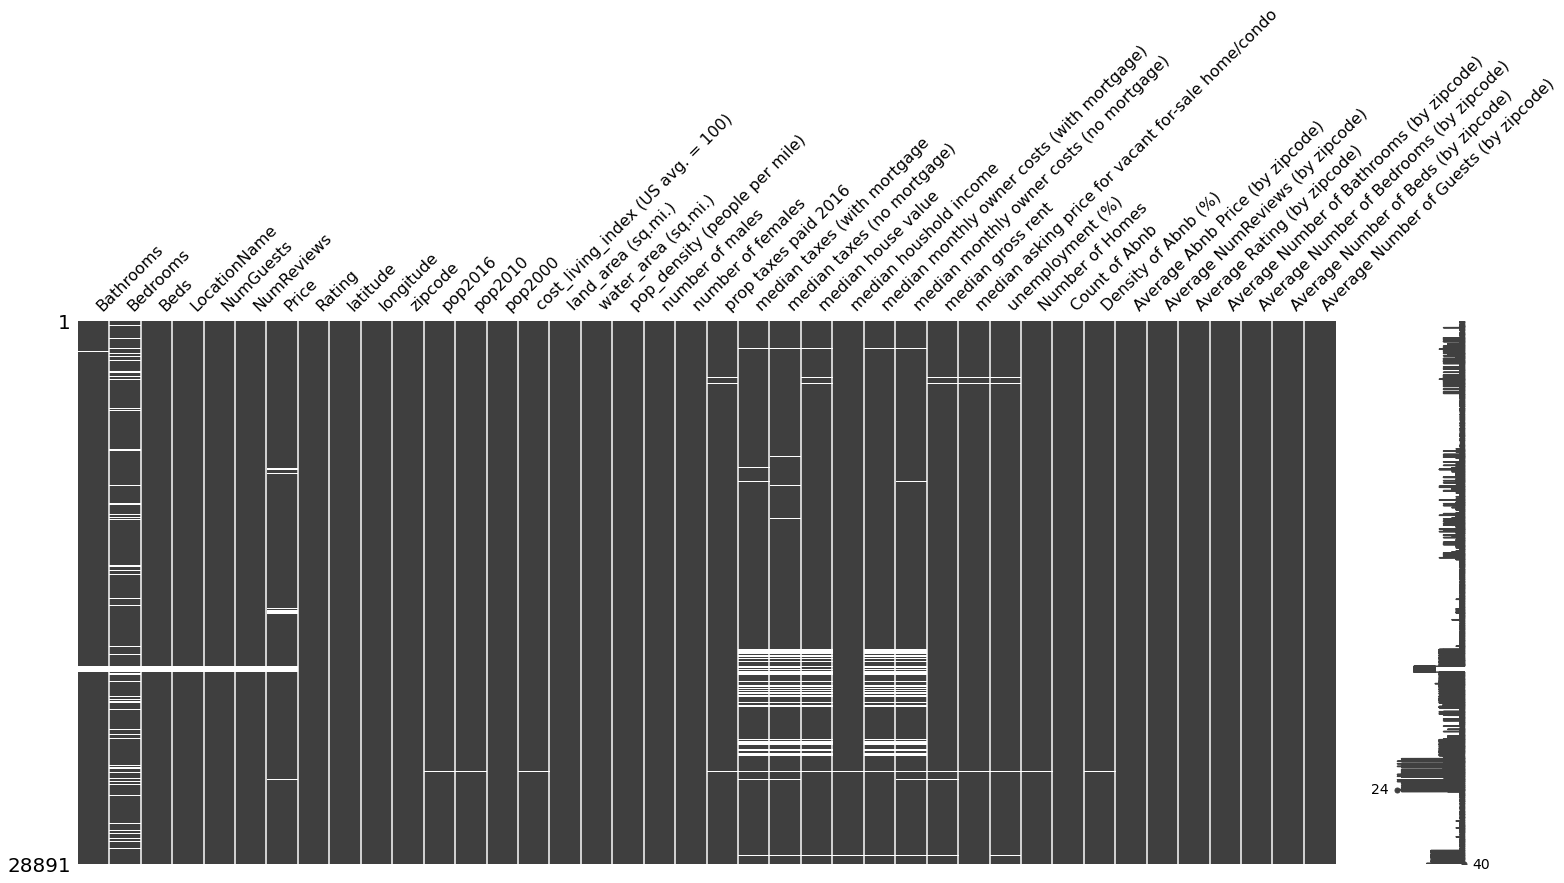

In [37]:
# TODO for Task 3.2==>Where are the missing data?
#visualize missing values as a matrix
msno.matrix(df, figsize=(25,10))

>Where are the missing data?

> As we see from the previous cells there are 22 out of 40 columns which has missing values, And we can see that from the previous 3 cells, The missing columns such as:
* median taxes (with mortgage
* median taxes (no mortgage)
* median monthly owner costs (no mortgage)\
* ....... and another columns\

and if we need to know the specific records of the missing values we can see that from `msno.matrix`


###3.3 How much data is missing?

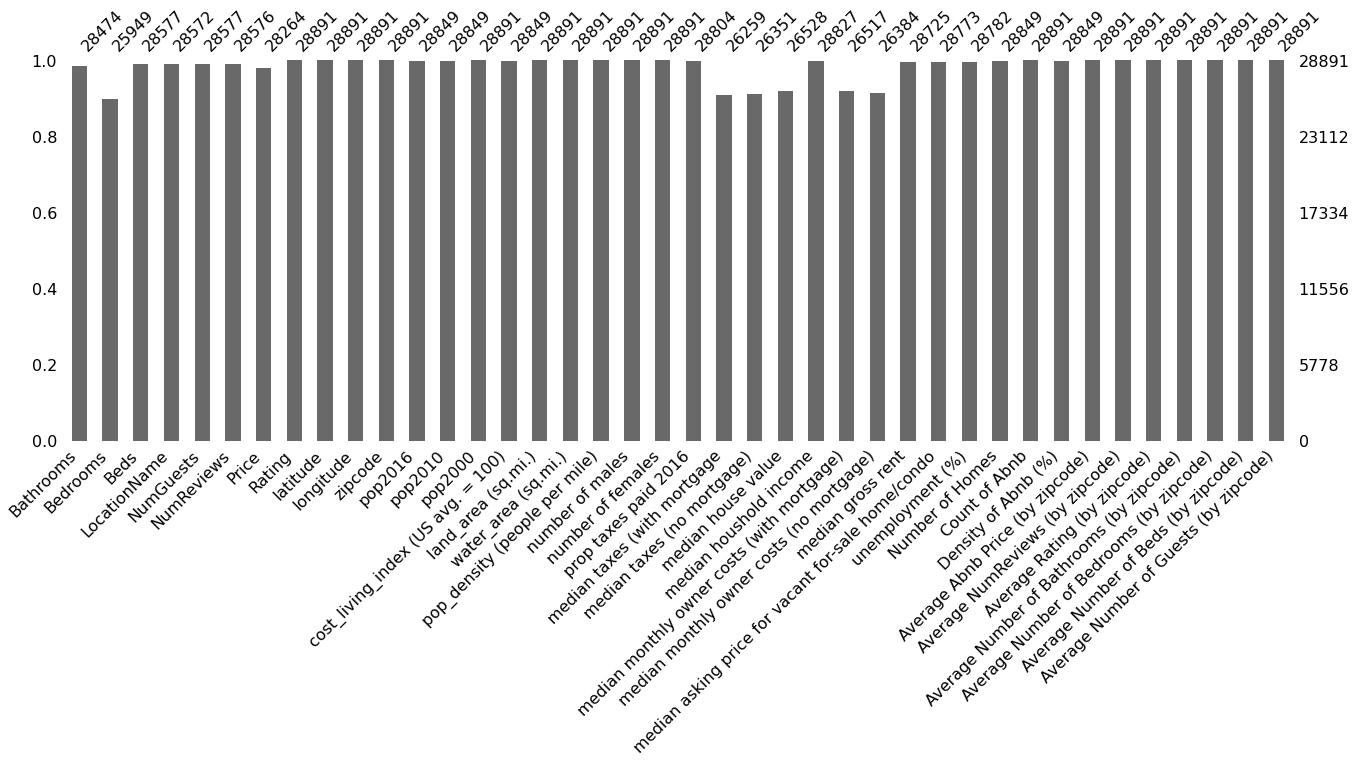

In [38]:
# TODO for Task 3.3==>Where are the missing data?, #3.3 How much data is missing?
#bar chart
msno.bar(df, figsize=(22,7))

In [39]:
#3.3 How much data is missing?
missing_data['Total missing'].sum()

18418

> #3.3 How much data is missing?
* as we see fromthe previous cell we have 18418 missing values 

###**3.4 Are there any variables often missing together？**

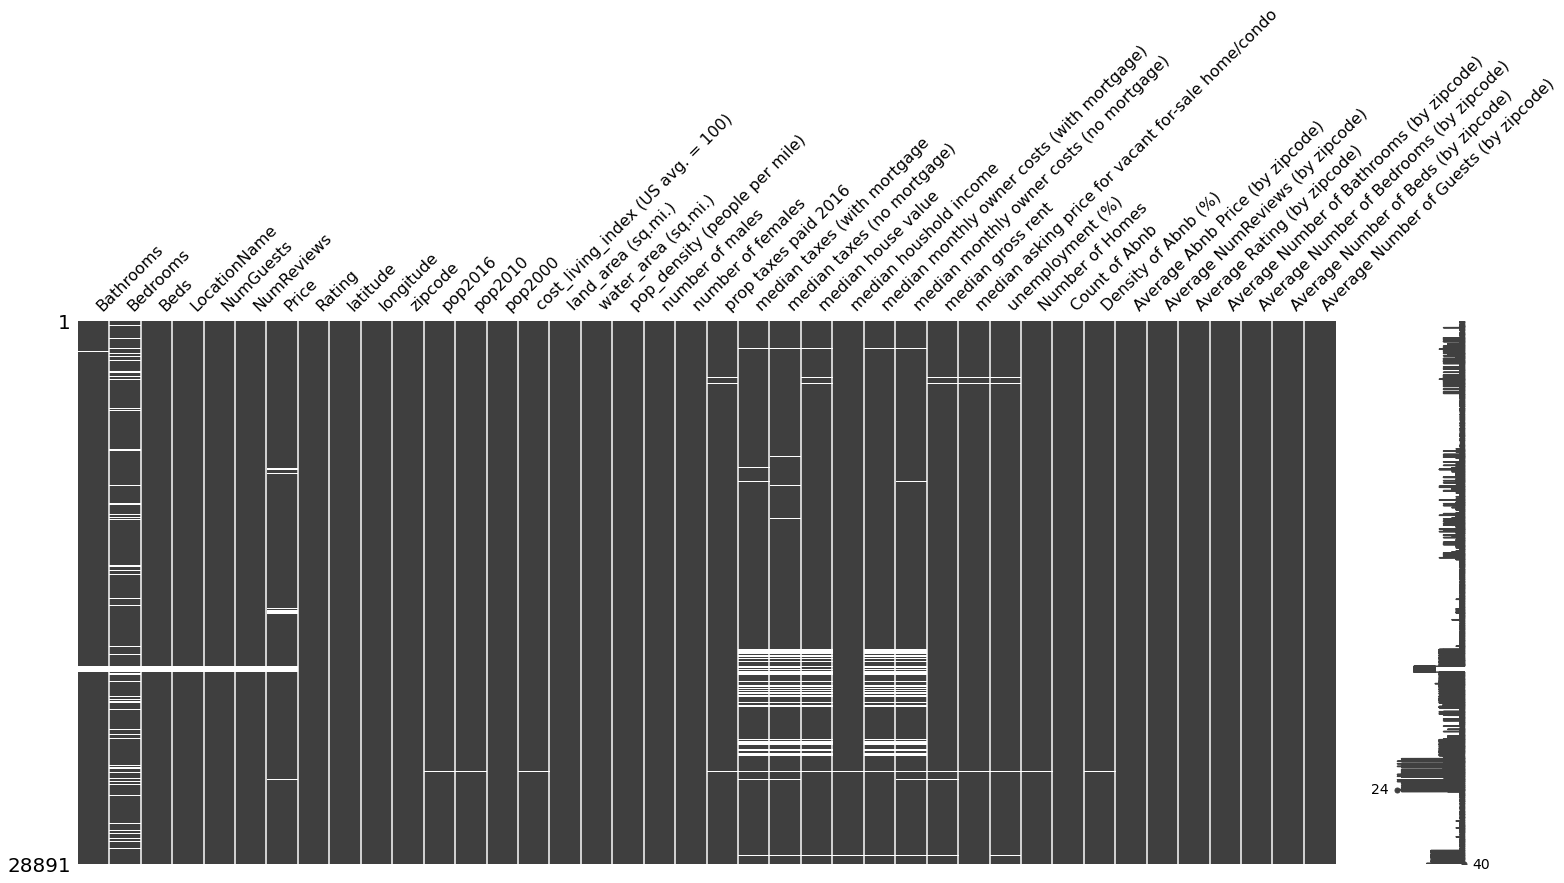

In [40]:
#visualize missing values as a matrix
msno.matrix(df, figsize=(25,10))

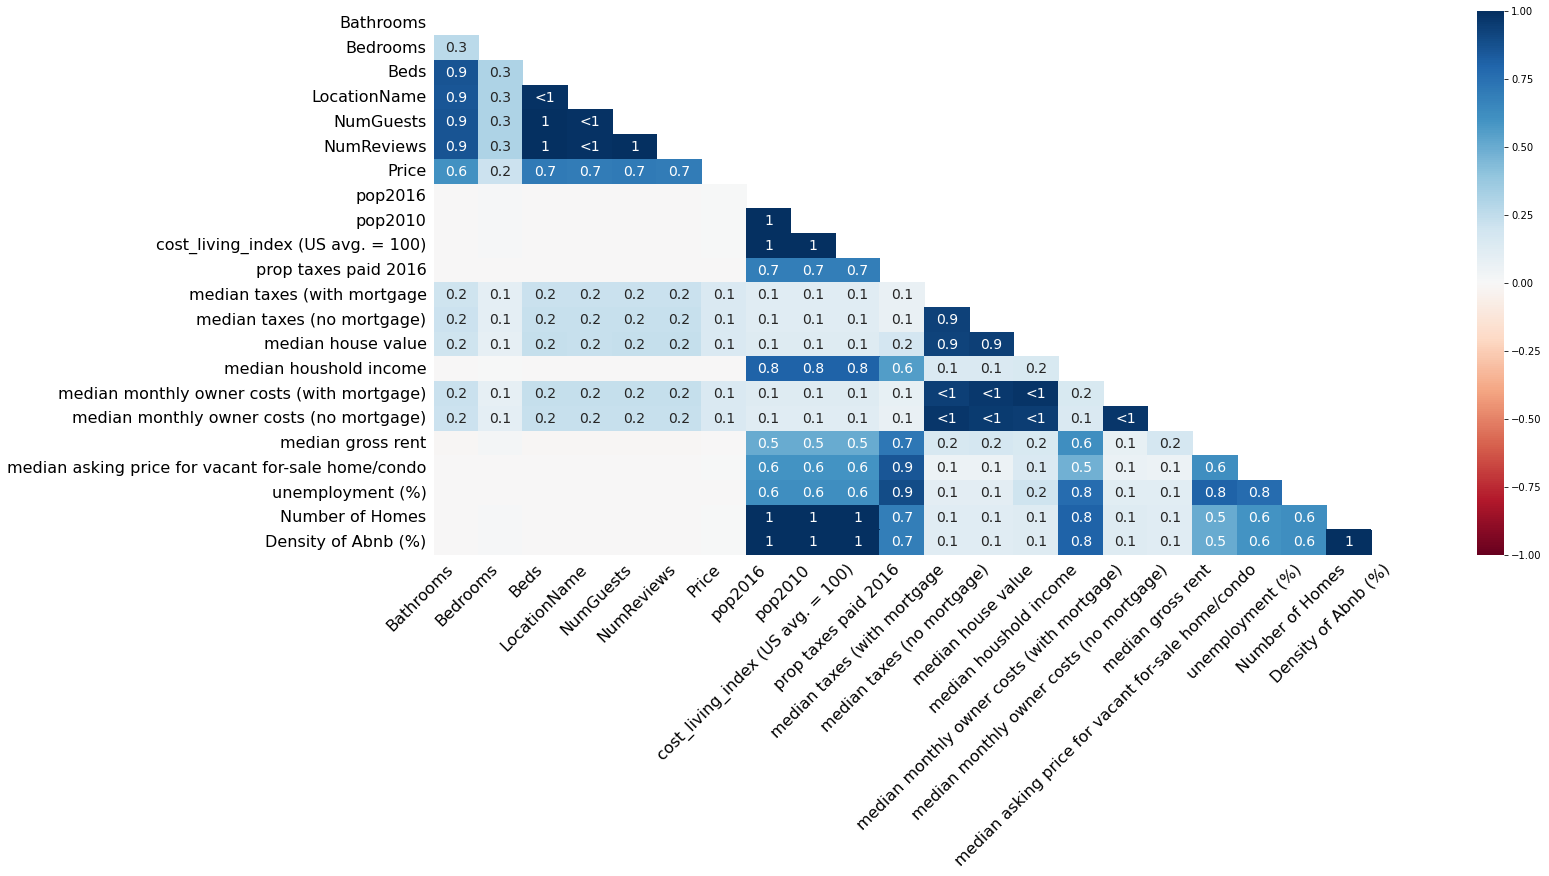

In [41]:
#visualize missing values as a matrix
msno.heatmap(df, figsize=(22,10))

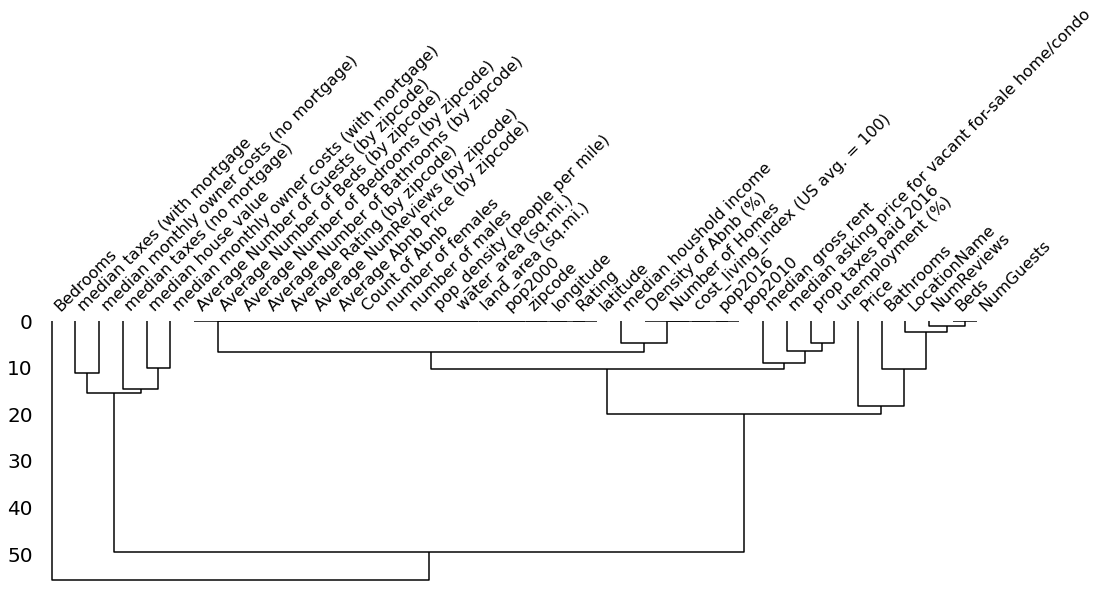

In [42]:
#dendrogram plot
msno.dendrogram(df, figsize=(17,5))

> As we See from the previous two Cells, Yes there are some variables missing together Such As:

> 
  * **`[Bathrooms ,Beds ,LocationName ,NumGuests, NumReviews, price]`** are missing together because if we looking for matrix plot and heatmap we will see there is a pattern between them and the correlations between them are between **`60% to 100%`** which so high

>
  * **`[pop2016, pop2010, cost_living_index (US avg. = 100), Number of Homes, prop taxes paid 2016, median houshold income, Density of Abnb (%), median asking price for vacant for-sale home/condo, median gross rent, unemployment (%)]`**are missing together because if we looking for matrix plot and heatmap we will see there is a pattern between them and the correlations between them are between **`60% to 100%`** which so high

>
  * **`[median taxes (with mortgage, median taxes (no mortgage), median monthly owner costs (no mortgage), median monthly owner costs (with mortgage), median house value]`**are missing together because if we looking for matrix plot and heatmap we will see there is a pattern between them and the correlations between them are **`around 100%`** which very high

#Task 4: What are the potential mechnisms of the missing values? Briefely explain your methodology and your findings (within this markdown cell), and write corresponding code in the next code cell.

##MCAR

> **The Bedrooms Column:**
* this column has no pattern for these missing data 
* has 2942 missing values which are a few missing and donot seem to be correlated with any other column, Hence, the missingness in Bedrooms column can be attributed as Missing Completely at Random.

>which mean i can do `[drop for the column or single imputation]`

##MNAR
> 
* **`[Bathrooms ,Beds ,LocationName ,NumGuests, NumReviews, price]`** ==> these columns have a pattern for these missing data
* **`[pop2016, pop2010, cost_living_index (US avg. = 100), Number of Homes, prop taxes paid 2016, median houshold income, Density of Abnb (%), median asking price for vacant for-sale home/condo, median gross rent,unemployment (%)]`** ==> these columns have a pattern for these missing data
* **`[median taxes (with mortgage, median taxes (no mortgage), median monthly owner costs (no mortgage), median monthly owner costs (with mortgage), median house value]`** ==> these columns have a pattern for these missing data

> The heatmap function shows that there are strong correlations between missing values of different features. low correlations further indicate that the data are MAR so may be this data are `MNAR`.

> so in this columns i will use multi imputation for every list from this above lists

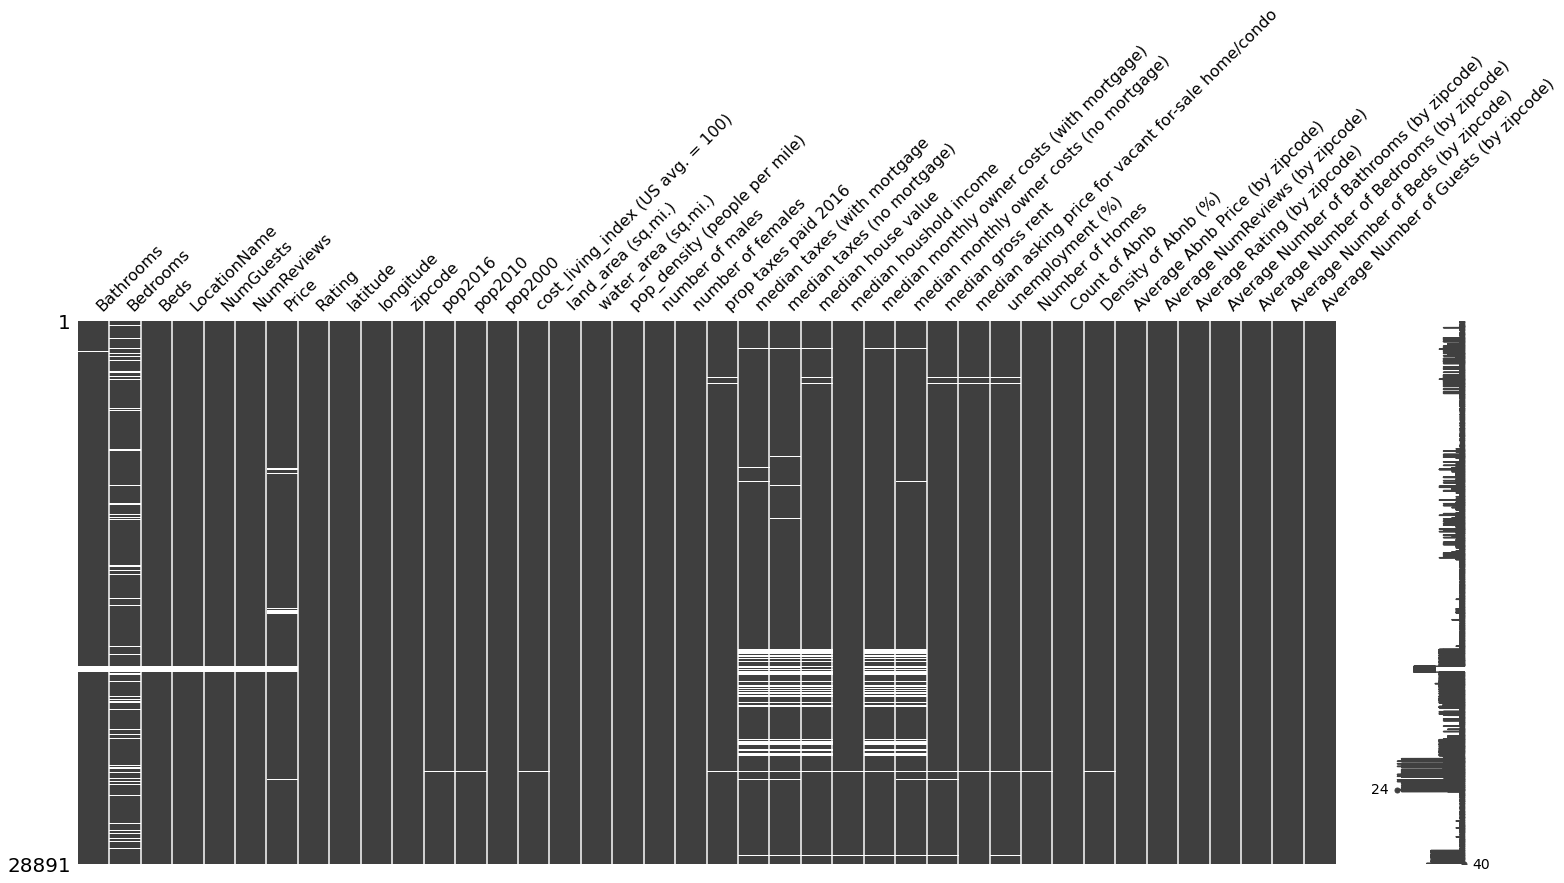

In [ ]:
#visualize missing values as a matrix
msno.matrix(df, figsize=(25,10))

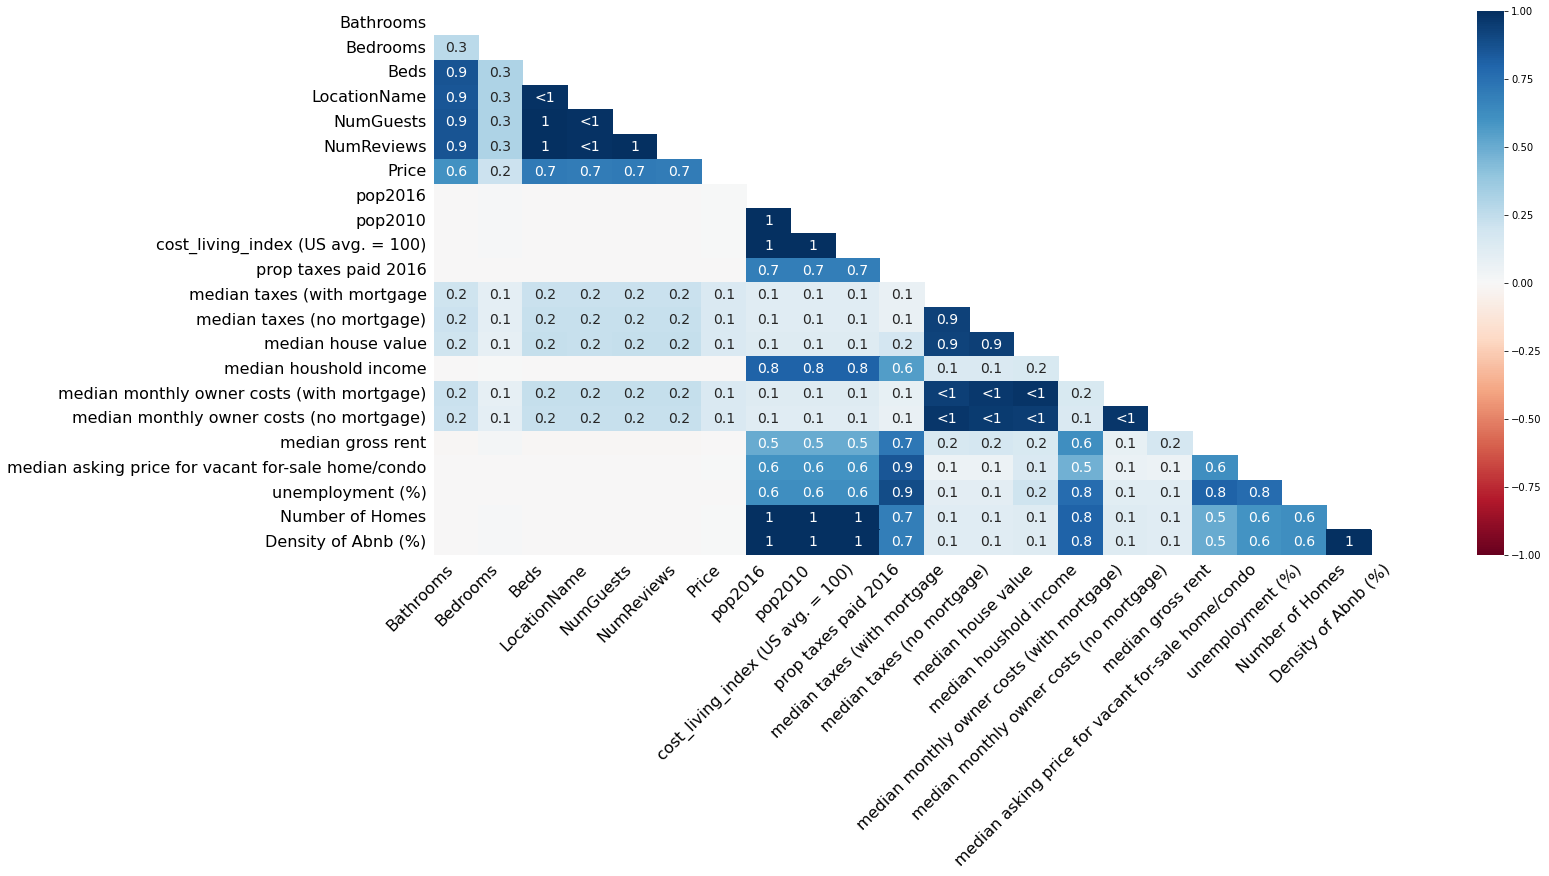

In [ ]:
#visualize missing values as a matrix
msno.heatmap(df, figsize=(22,10))

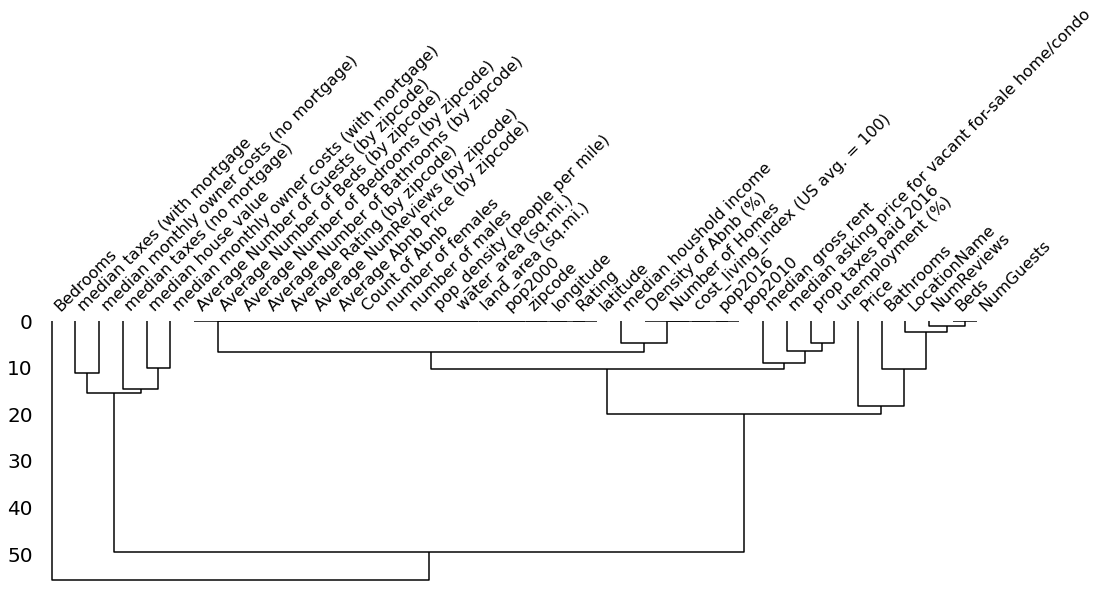

In [ ]:
#dendrogram plot
msno.dendrogram(df, figsize=(17,5))

#Task 5: Handling missing values, Briefely explain your methodology below (within this markdown cell), and write corresponding code in the next code cell.

before i handling the missing values i will convert all categorical data into numirical and i will keep the missing values and not converting them when i using labelencoder to apply the imputation on this data

##Handling Bedrooms

In [43]:
# TODO for Task 5
df = df.apply(lambda series: pd.Series(LabelEncoder().fit_transform(series[series.notnull()]), index=series[series.notnull()].index))

In [44]:
#i will using the simpleImputer for the bedrooms column to handling the missing values
si = SimpleImputer(strategy='mean')
# impute training data
df['Bedrooms'] = si.fit_transform(df[['Bedrooms']])

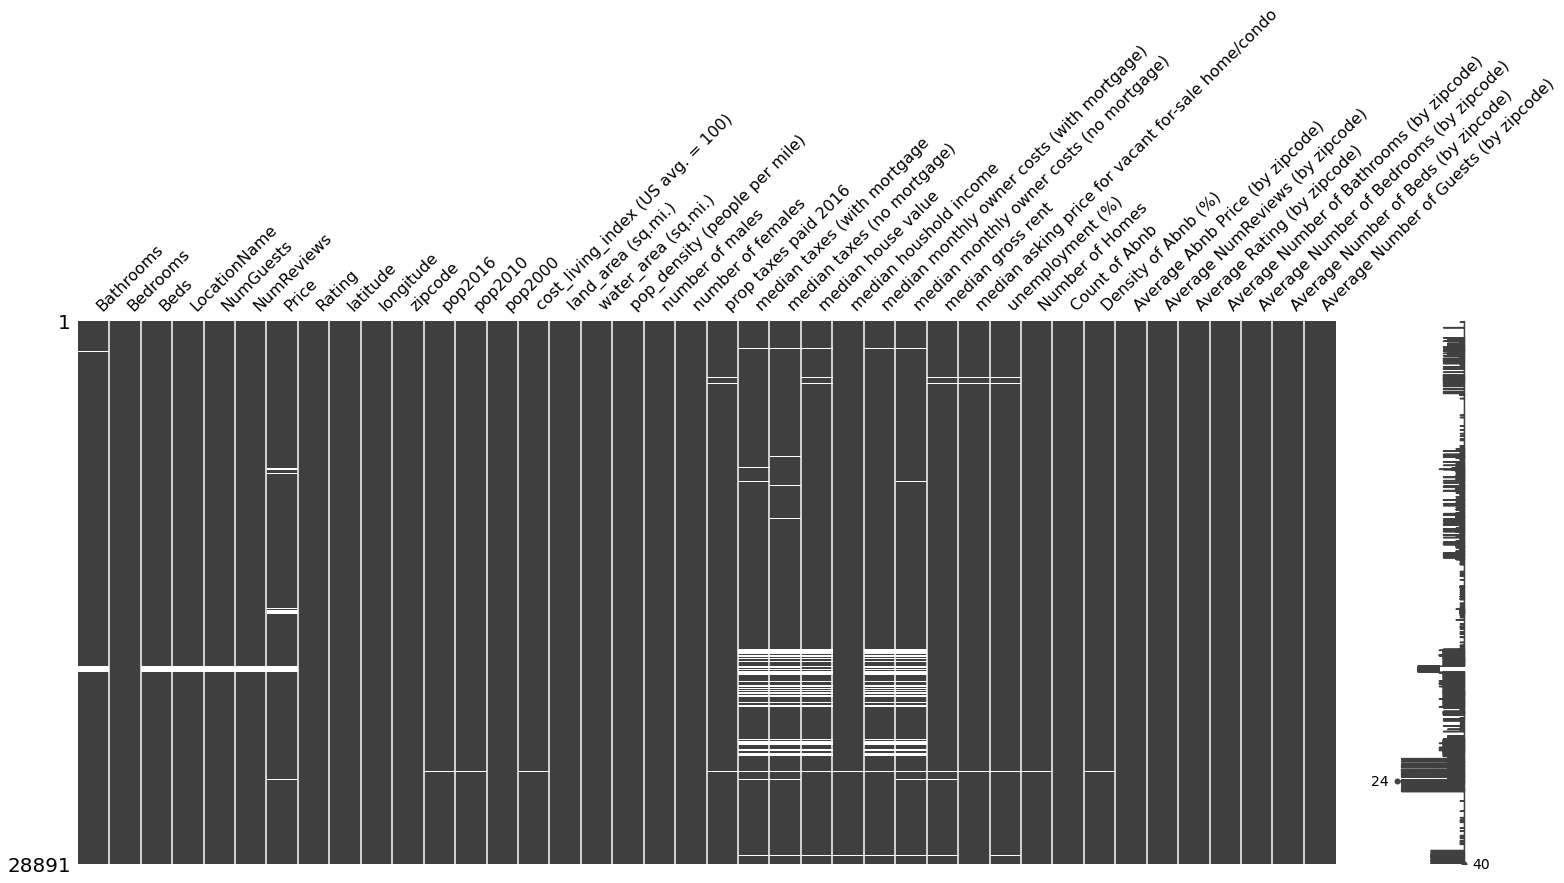

In [45]:
#visualize missing values as a matrix
msno.matrix(df, figsize=(25,10))

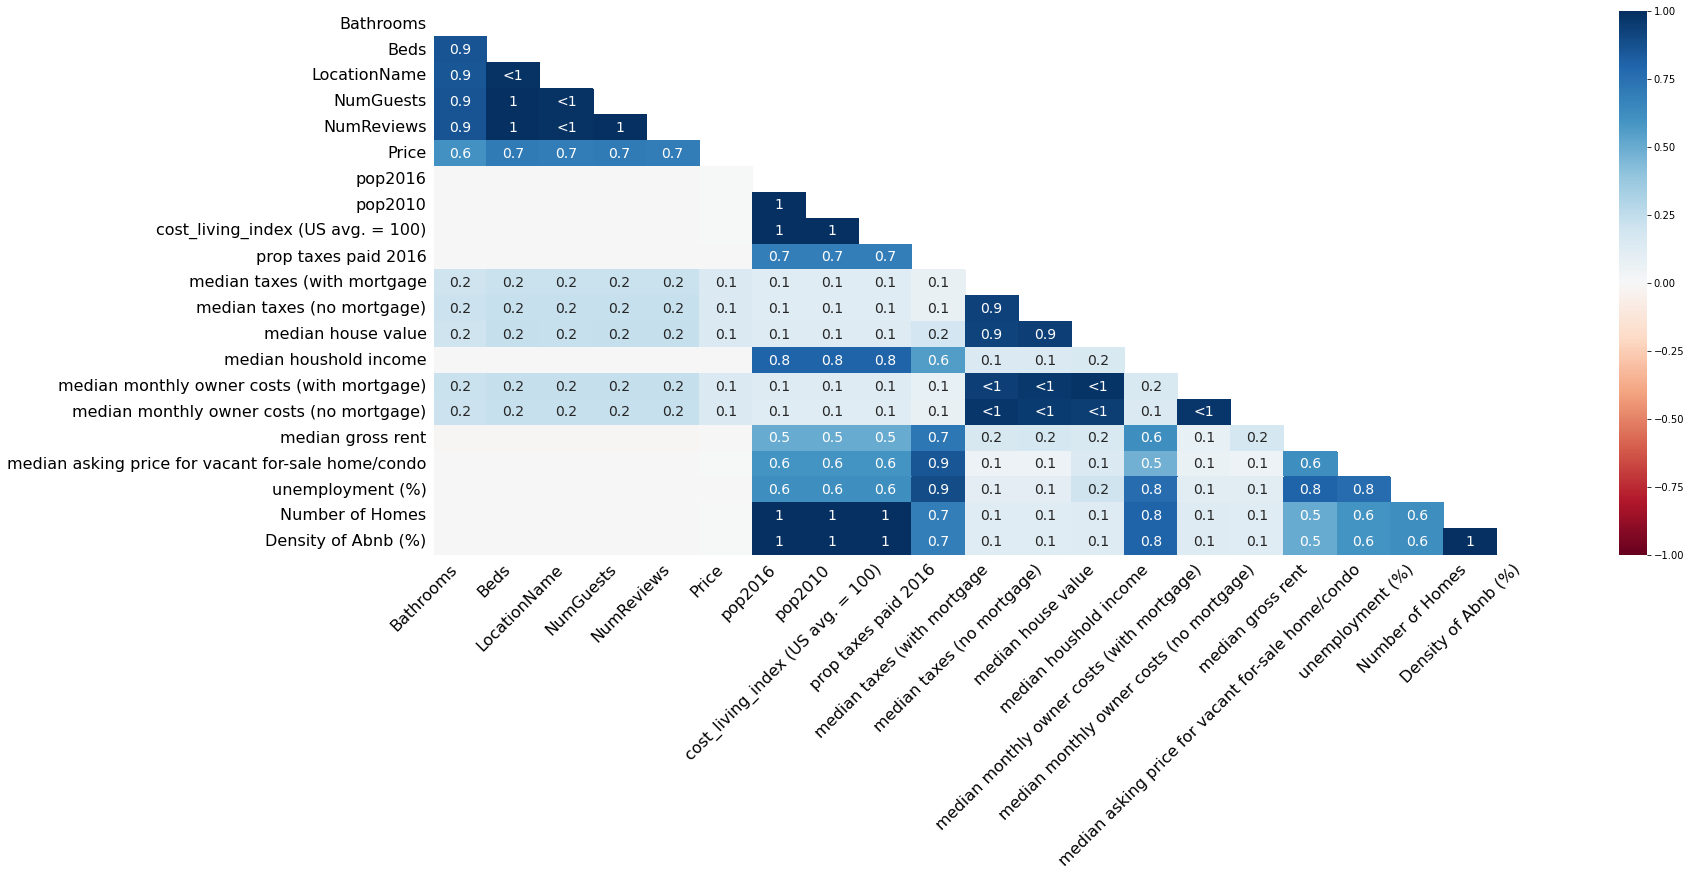

In [46]:
#heapmap for correlation analysis
msno.heatmap(df, figsize=(25,10))

In [47]:
# TODO for Task 3.1
# summary of the number of nulls and count the ratio of missing values
total_miss = df.isnull().sum()
percent_miss = (total_miss/df.isnull().count()*100)

# sort attributes by missing value ratio
missing_data = pd.DataFrame({'Total missing':total_miss,'% missing':percent_miss})
print("the shape of the missing data frame: ", missing_data.shape)
missing_data.sort_values(by='Total missing',ascending=False)

the shape of the missing data frame:  (40, 2)


,Total missing,% missing
median taxes (with mortgage,2632,9.110103
median taxes (no mortgage),2540,8.791665
median monthly owner costs (no mortgage),2507,8.677443
median monthly owner costs (with mortgage),2374,8.217092
median house value,2363,8.179018
Price,627,2.170226
Bathrooms,417,1.443356
LocationName,319,1.104150
NumReviews,315,1.090305
Beds,314,1.086844


##Handling `[Bathrooms ,Beds ,LocationName ,NumGuests, NumReviews, price]`

> Now I will Apply the IterativeImputer into these columns `[Bathrooms ,Beds ,LocationName ,NumGuests, NumReviews, price]` to handling the missing values

In [48]:
imputer = IterativeImputer(max_iter=20, random_state=42)
df[['Bathrooms', 'Beds', 'LocationName', 'NumGuests', 'NumReviews', 'Price']] = imputer.fit_transform(df[['Bathrooms', 'Beds', 'LocationName', 'NumGuests', 'NumReviews', 'Price']])

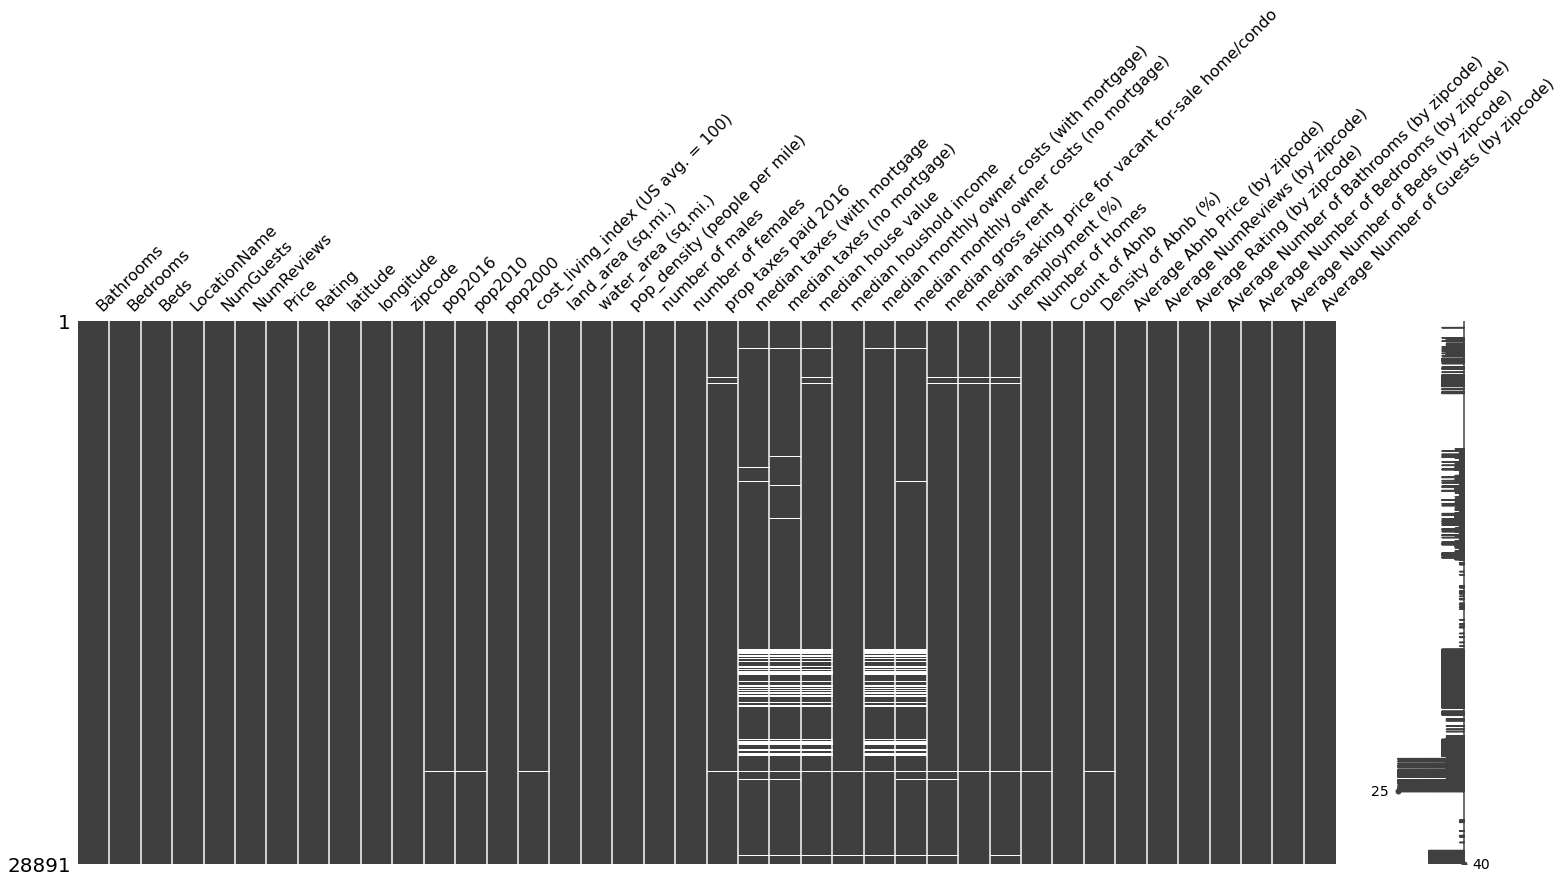

In [49]:
#visualize missing values as a matrix
msno.matrix(df, figsize=(25,10))

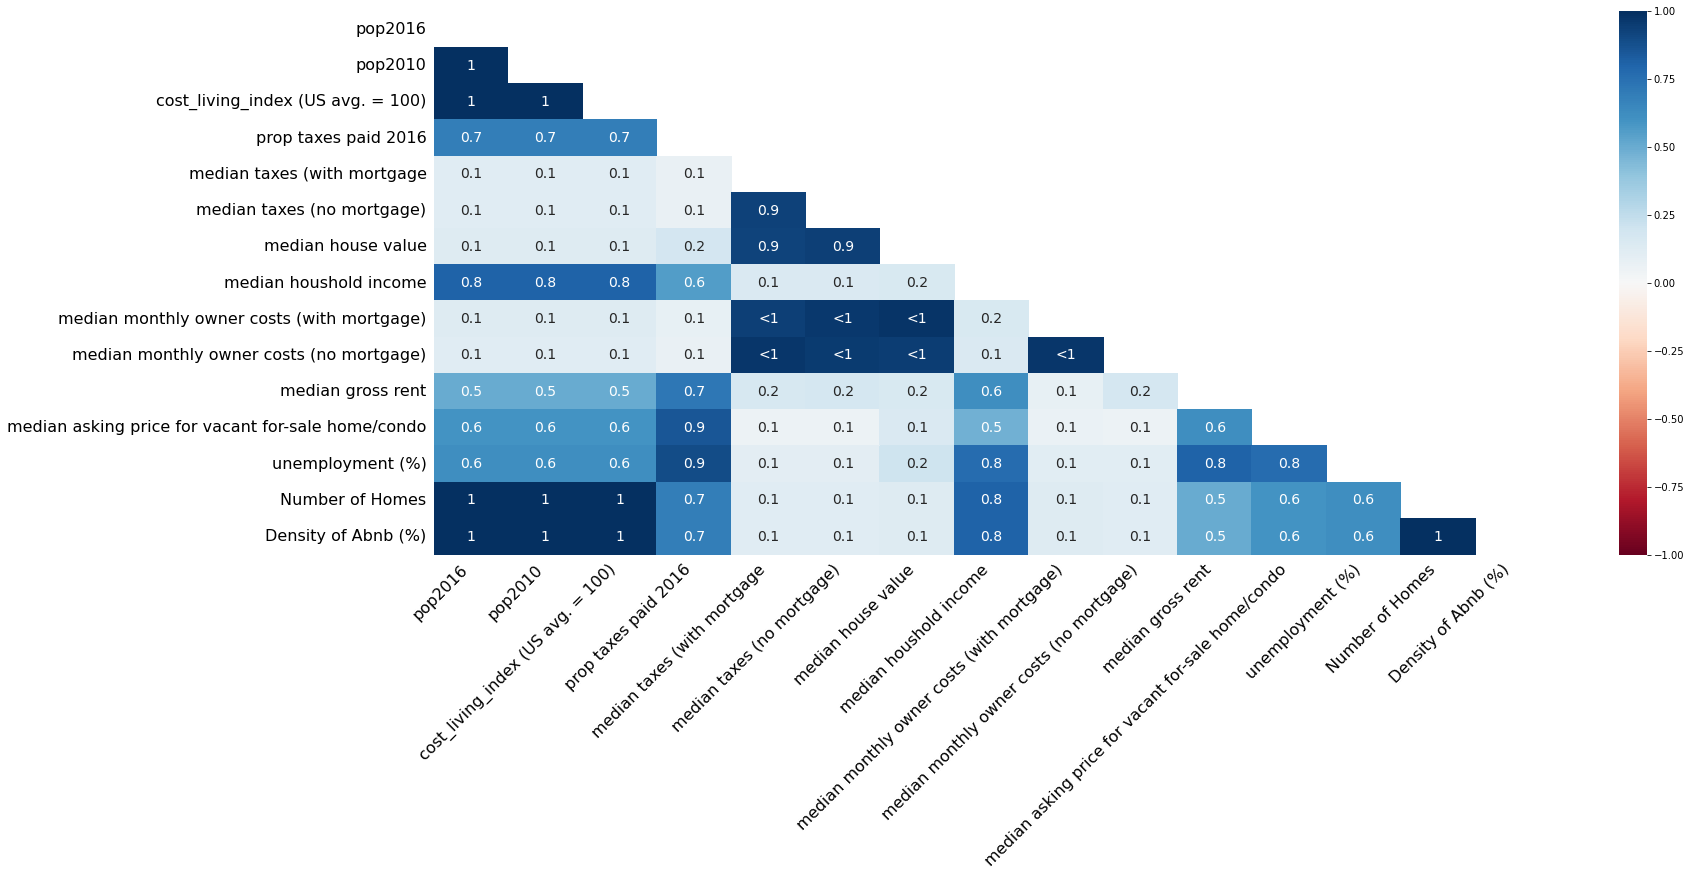

In [50]:
#heapmap for correlation analysis
msno.heatmap(df, figsize=(25,10))

In [51]:
# summary of the number of nulls and count the ratio of missing values
total_miss = df.isnull().sum()
percent_miss = (total_miss/df.isnull().count()*100)

# sort attributes by missing value ratio
missing_data = pd.DataFrame({'Total missing':total_miss,'% missing':percent_miss})
print("the shape of the missing data frame: ", missing_data.shape)
missing_data.sort_values(by='Total missing',ascending=False)

the shape of the missing data frame:  (40, 2)


,Total missing,% missing
median taxes (with mortgage,2632,9.110103
median taxes (no mortgage),2540,8.791665
median monthly owner costs (no mortgage),2507,8.677443
median monthly owner costs (with mortgage),2374,8.217092
median house value,2363,8.179018
median gross rent,166,0.574573
median asking price for vacant for-sale home/condo,118,0.408432
unemployment (%),109,0.377280
prop taxes paid 2016,87,0.301132
median houshold income,64,0.221522


##Handling `[pop2016, pop2010, cost_living_index (US avg. = 100), Number of Homes, prop taxes paid 2016, median houshold income, Density of Abnb (%), median asking price for vacant for-sale home/condo, median gross rent, unemployment (%)]`

In [56]:
imputer = IterativeImputer(max_iter=20, random_state=42)
df[['pop2016', 'pop2010', 'cost_living_index (US avg. = 100)', 'Number of Homes', 'prop taxes paid 2016', 'median houshold income', 'Density of Abnb (%)', 'median asking price for vacant for-sale home/condo', 'median gross rent', 'unemployment (%)']] = imputer.fit_transform(
    df[['pop2016', 'pop2010', 'cost_living_index (US avg. = 100)', 'Number of Homes', 'prop taxes paid 2016', 'median houshold income', 'Density of Abnb (%)', 'median asking price for vacant for-sale home/condo', 'median gross rent', 'unemployment (%)']])

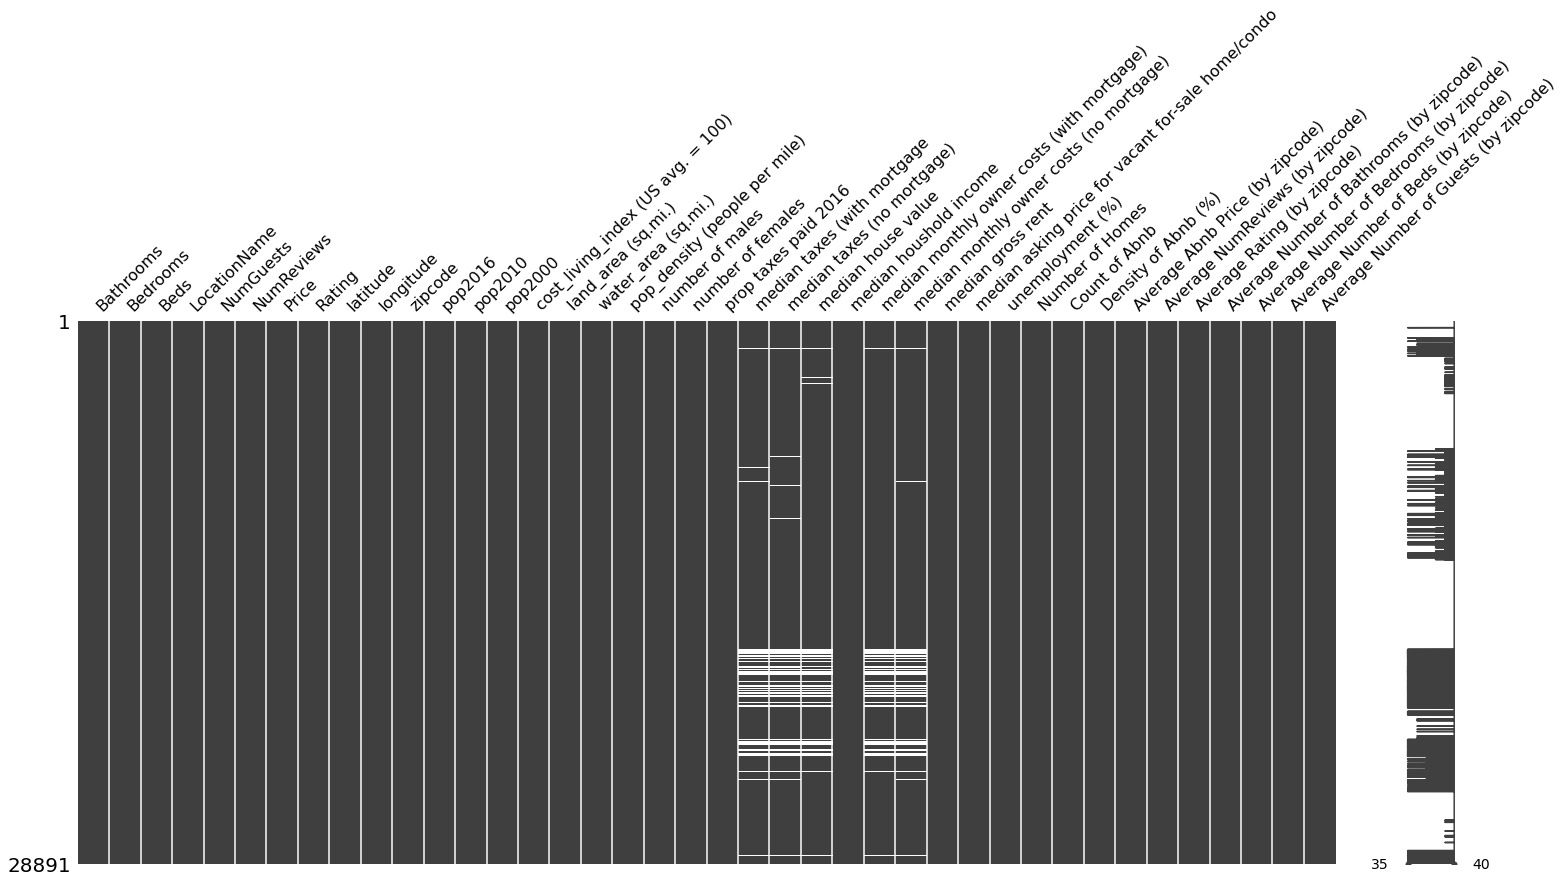

In [57]:
#visualize missing values as a matrix
msno.matrix(df, figsize=(25,10))

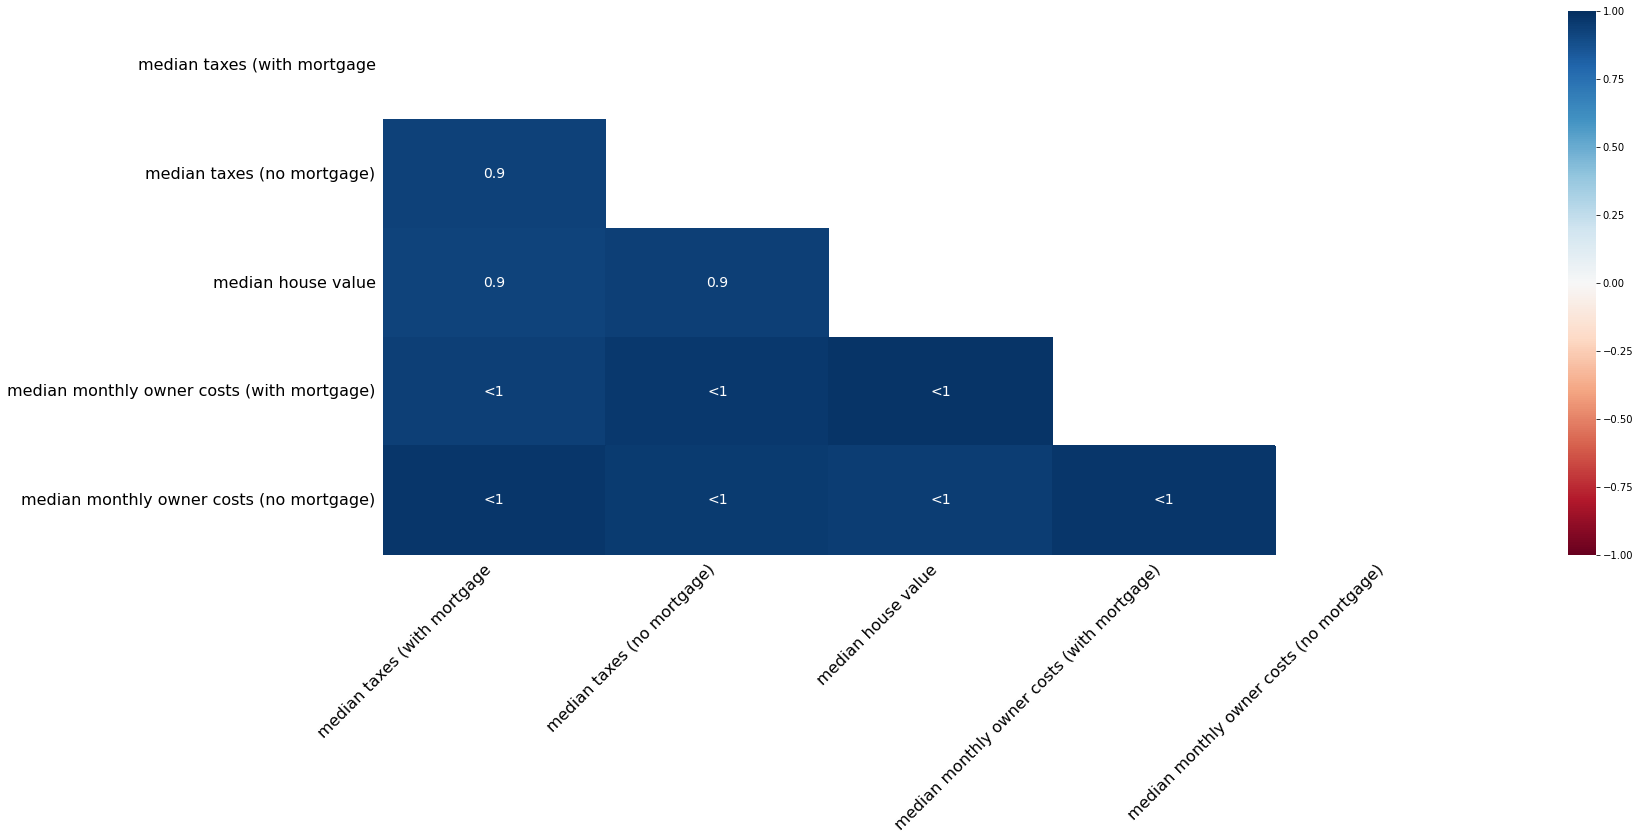

In [58]:
#heapmap for correlation analysis
msno.heatmap(df, figsize=(25,10))

In [59]:
# TODO for Task 3.1
# summary of the number of nulls and count the ratio of missing values
total_miss = df.isnull().sum()
percent_miss = (total_miss/df.isnull().count()*100)

# sort attributes by missing value ratio
missing_data = pd.DataFrame({'Total missing':total_miss,'% missing':percent_miss})
print("the shape of the missing data frame: ", missing_data.shape)
missing_data.sort_values(by='Total missing',ascending=False)

the shape of the missing data frame:  (40, 2)


,Total missing,% missing
median taxes (with mortgage,2632,9.110103
median taxes (no mortgage),2540,8.791665
median monthly owner costs (no mortgage),2507,8.677443
median monthly owner costs (with mortgage),2374,8.217092
median house value,2363,8.179018
Bedrooms,0,0.000000
median houshold income,0,0.000000
median gross rent,0,0.000000
median asking price for vacant for-sale home/condo,0,0.000000
unemployment (%),0,0.000000


##Handling `[median taxes (with mortgage, median taxes (no mortgage), median monthly owner costs (no mortgage), median monthly owner costs (with mortgage), median house value]`

In [61]:
imputer = IterativeImputer(max_iter=20, random_state=42)
df[['median taxes (with mortgage', 'median taxes (no mortgage)', 'median monthly owner costs (no mortgage)', 'median monthly owner costs (with mortgage)', 'median house value']] =imputer.fit_transform(
    df[['median taxes (with mortgage', 'median taxes (no mortgage)', 'median monthly owner costs (no mortgage)', 'median monthly owner costs (with mortgage)', 'median house value']])

/usr/local/lib/python3.7/dist-packages/sklearn/impute/_iterative.py:701: ConvergenceWarning: [IterativeImputer] Early stopping criterion not reached.
  ConvergenceWarning,


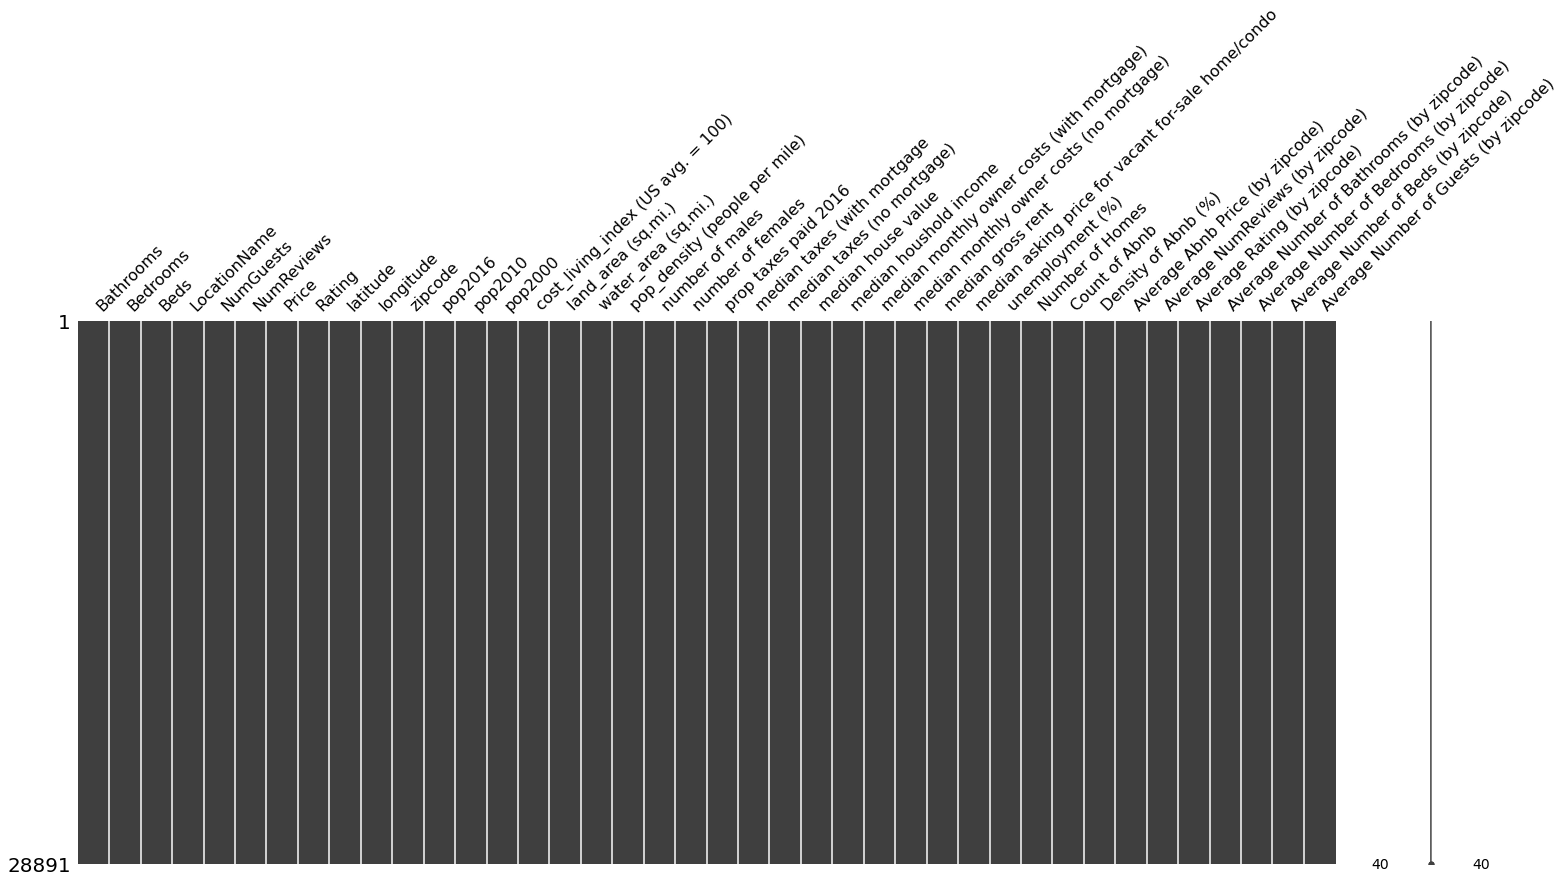

In [62]:
#visualize missing values as a matrix
msno.matrix(df, figsize=(25,10))

/usr/local/lib/python3.7/dist-packages/seaborn/matrix.py:305: UserWarning: Attempting to set identical bottom == top == 0 results in singular transformations; automatically expanding.
  ax.set(xlim=(0, self.data.shape[1]), ylim=(0, self.data.shape[0]))
/usr/local/lib/python3.7/dist-packages/seaborn/matrix.py:305: UserWarning: Attempting to set identical left == right == 0 results in singular transformations; automatically expanding.
  ax.set(xlim=(0, self.data.shape[1]), ylim=(0, self.data.shape[0]))


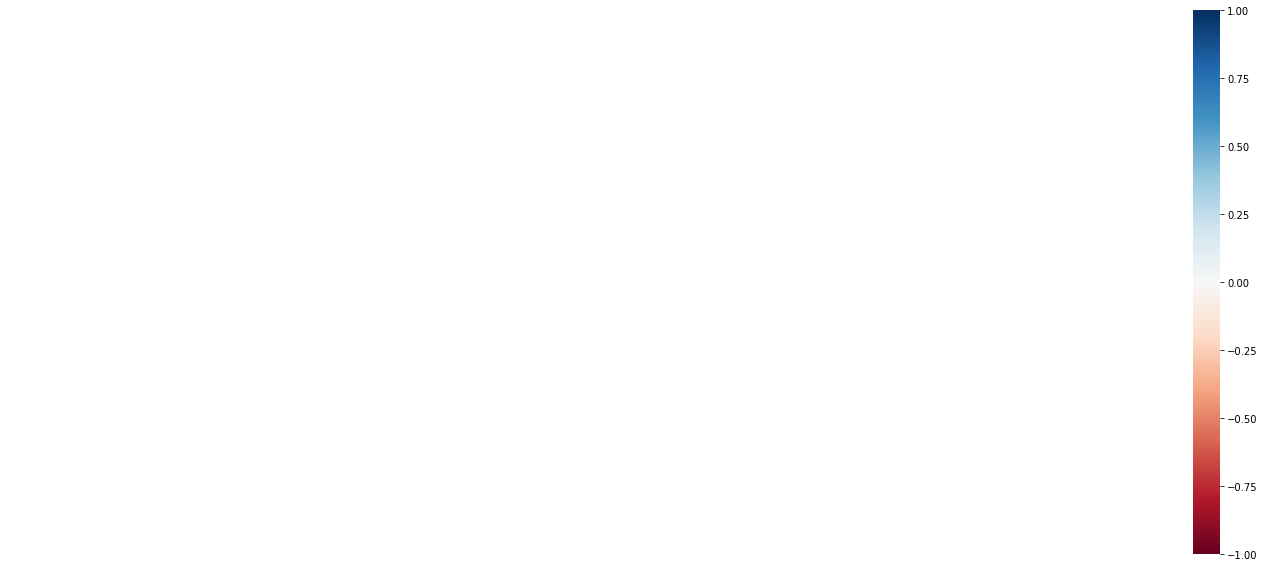

In [63]:
#heapmap for correlation analysis
msno.heatmap(df, figsize=(25,10))

In [65]:
# TODO for Task 3.1
# summary of the number of nulls and count the ratio of missing values
total_miss = df.isnull().sum()
percent_miss = (total_miss/df.isnull().count()*100)

# sort attributes by missing value ratio
missing_data = pd.DataFrame({'Total missing':total_miss,'% missing':percent_miss})
print("the shape of the missing data frame: ", missing_data.shape)
missing_data.sort_values(by='Total missing',ascending=False)

the shape of the missing data frame:  (40, 2)


,Total missing,% missing
Bathrooms,0,0.0
Bedrooms,0,0.0
median taxes (no mortgage),0,0.0
median house value,0,0.0
median houshold income,0,0.0
median monthly owner costs (with mortgage),0,0.0
median monthly owner costs (no mortgage),0,0.0
median gross rent,0,0.0
median asking price for vacant for-sale home/condo,0,0.0
unemployment (%),0,0.0


> As we see now we have no missing values

#Task 6: Impact on classification performance. Consider one of the above handling method you proposed for this dataset and perform classification tast to investigate if your handling method can improve classificaiton performance. 

#Train-test split: you can do one split of train and test where 70% of the data for training and the remaining 30% for testing. 
#Classifier: you can pick any two tranditional binary classifier (e.g., from sklearn)

##Spliting the data

In [162]:
#specify target column
Y = df['Rating']
print(Y.shape)
Y.head()

(28891,)


0    1
1    0
2    1
3    1
4    1
Name: Rating, dtype: int64

In [163]:
df['Rating']

0        1
1        0
2        1
3        1
4        1
        ..
33140    0
33141    1
33142    1
33143    1
33144    1
Name: Rating, Length: 28891, dtype: int64

In [164]:
#specify training columns
X = df.copy()
X.drop('Rating', axis=1, inplace=True)
X.head()

,Bathrooms,Bedrooms,Beds,LocationName,NumGuests,NumReviews,Price,latitude,longitude,zipcode,...,Number of Homes,Count of Abnb,Density of Abnb (%),Average Abnb Price (by zipcode),Average NumReviews (by zipcode),Average Rating (by zipcode),Average Number of Bathrooms (by zipcode),Average Number of Bedrooms (by zipcode),Average Number of Beds (by zipcode),Average Number of Guests (by zipcode)
0,1.0,0.0,1.0,15.0,1.0,5.0,28.0,8144,13255,251,...,49.0,66,282.0,180,130,235,226,232,228,228
1,1.0,0.0,1.0,15.0,1.0,13.0,28.0,8766,13207,253,...,116.0,80,255.0,176,44,161,175,151,91,91
2,2.0,1.0,2.0,15.0,3.0,15.0,90.0,8100,12864,247,...,92.0,127,309.0,234,162,232,212,197,172,172
3,1.0,0.0,1.0,15.0,1.0,301.0,68.0,8351,13230,244,...,72.0,100,293.0,236,181,210,180,198,185,185
4,1.0,0.0,1.0,15.0,1.0,17.0,40.0,8598,12546,246,...,97.0,125,305.0,262,89,199,194,186,188,188


In [165]:
#splite the data into Train and Test by 90% for training to 30% for testing
xTrain, xTest, yTrain, yTest = train_test_split(X, Y, test_size = .3, random_state = 42, shuffle = True)
print(xTrain.shape)
print(xTest.shape)
print(yTrain.shape)
print(yTest.shape)

(20223, 39)
(8668, 39)
(20223,)
(8668,)


##LR_Model

In [78]:
LogisticRegressionModel = LogisticRegression(penalty = 'l2', solver = 'liblinear', C = 50, random_state=10, max_iter = 500)
LogisticRegressionModel.fit(xTrain, yTrain)

LogisticRegression(C=50, max_iter=500, random_state=10, solver='liblinear')

In [79]:
#test the accuracy of model on training set
print('LogisticRegressionModel Train Score is : ' , LogisticRegressionModel.score(xTrain, yTrain))
print('----------------------------------------------------')

LogisticRegressionModel Train Score is :  0.6880284824210058
----------------------------------------------------


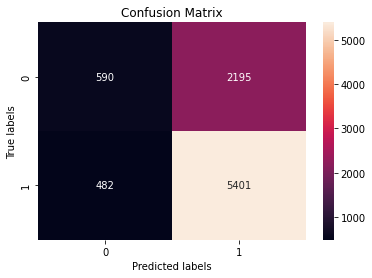

In [80]:
#Calculating Prediction
yPred = LogisticRegressionModel.predict(xTest)

#----------------------------------------------------
#Calculating Confusion Matrix
CM = confusion_matrix(yTest, yPred)

# drawing confusion matrix
ax= plt.subplot()
sns.heatmap(CM, annot=True, fmt='g', ax = ax);
ax.set_xlabel('Predicted labels');
ax.set_ylabel('True labels'); 
ax.set_title('Confusion Matrix');

In [81]:
#Calculating classification Report (precision, recall, f1-score, accuracy) on test set:  

ClassificationReport = classification_report(yTest, yPred)
print('Classification Report is : \n', ClassificationReport)

Classification Report is : 
               precision    recall  f1-score   support

           0       0.55      0.21      0.31      2785
           1       0.71      0.92      0.80      5883

    accuracy                           0.69      8668
   macro avg       0.63      0.56      0.55      8668
weighted avg       0.66      0.69      0.64      8668



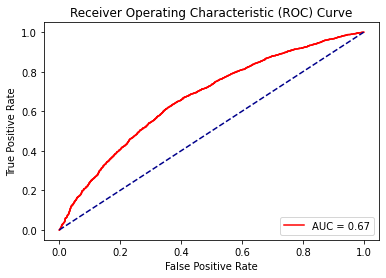

In [82]:
#Calculating Area Under the Curve with predict probapility:
fpr, tpr, thresholds = roc_curve(yTest, LogisticRegressionModel.predict_proba(xTest)[:,1])

roc_auc = roc_auc_score(yTest, LogisticRegressionModel.predict_proba(xTest)[:,1])
plt.plot(fpr, tpr, 'r', label = 'AUC = %0.2f' % roc_auc)
plt.plot(fpr, tpr, color='red', label='')
plt.plot([0, 1], [0, 1], color='darkblue', linestyle='--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc = 'lower right')

##SVM_Model

In [92]:
#normalize the data values
scaler = StandardScaler()
scaler.fit(xTrain)
xTrain=scaler.transform(xTrain)
xTest=scaler.transform(xTest)

In [93]:
SVM_model = SVC( kernel = 'rbf', C=100 , gamma=0.001 , random_state = 42 , probability=True)
SVM_model.fit(xTrain, yTrain)

SVC(C=100, gamma=0.001, probability=True, random_state=0)

In [94]:
#test the accuracy of model on training set
print('SVM_model Train Score is : ' , SVM_model.score(xTrain, yTrain))

SVM_model Train Score is :  0.6904514661524007


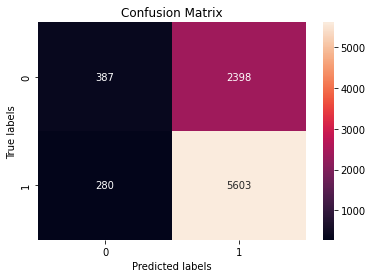

In [95]:
#Calculating Prediction
yPred = SVM_model.predict(xTest)

#----------------------------------------------------
#Calculating Confusion Matrix
CM = confusion_matrix(yTest, yPred)

# drawing confusion matrix
ax= plt.subplot()
sns.heatmap(CM, annot=True, fmt='g', ax = ax);
ax.set_xlabel('Predicted labels');
ax.set_ylabel('True labels'); 
ax.set_title('Confusion Matrix');

In [96]:
#Calculating classification Report (precision, recall, f1-score, accuracy) on test set:  

ClassificationReport = classification_report(yTest, yPred)
print('Classification Report is : \n', ClassificationReport)

Classification Report is : 
               precision    recall  f1-score   support

           0       0.58      0.14      0.22      2785
           1       0.70      0.95      0.81      5883

    accuracy                           0.69      8668
   macro avg       0.64      0.55      0.52      8668
weighted avg       0.66      0.69      0.62      8668



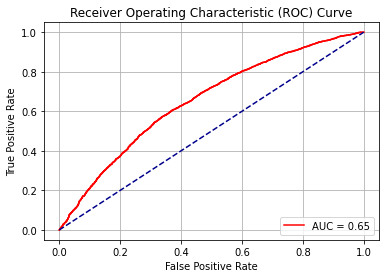

In [97]:
#Calculating Area Under the Curve with predict probapility:
fpr, tpr, thresholds = roc_curve(yTest, SVM_model.predict_proba(xTest)[:,1])

roc_auc = roc_auc_score(yTest, SVM_model.predict_proba(xTest)[:,1])
plt.plot(fpr, tpr, 'r', label = 'AUC = %0.2f' % roc_auc)
plt.plot(fpr, tpr, color='red', label='')
plt.plot([0, 1], [0, 1], color='darkblue', linestyle='--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc = 'lower right')
plt.grid()


##DT_Model

In [83]:
#train the model with optimal hyperparameters
D_Tree = DecisionTreeClassifier(criterion= "gini", max_depth= 12 , min_samples_leaf= 6 , random_state= 53)
D_Tree.fit(xTrain , yTrain)

DecisionTreeClassifier(max_depth=12, min_samples_leaf=6, random_state=53)

In [84]:
#test the accuracy of model on training set
print('D_Tree Train Score is : ' , D_Tree.score(xTrain, yTrain))

D_Tree Train Score is :  0.7635860159224646


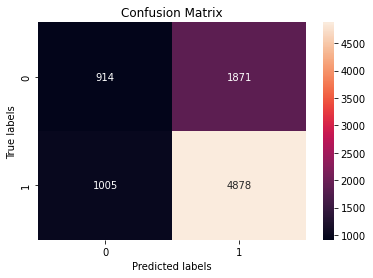

In [85]:
#Calculating Prediction
yPred = D_Tree.predict(xTest)

#----------------------------------------------------
#Calculating Confusion Matrix
CM = confusion_matrix(yTest, yPred)

# drawing confusion matrix
ax= plt.subplot()
sns.heatmap(CM, annot=True, fmt='g', ax = ax);
ax.set_xlabel('Predicted labels');
ax.set_ylabel('True labels'); 
ax.set_title('Confusion Matrix');

In [86]:
#Calculating classification Report (precision, recall, f1-score, accuracy) on test set:  

ClassificationReport = classification_report(yTest, yPred)
print('Classification Report is : \n', ClassificationReport)

Classification Report is : 
               precision    recall  f1-score   support

           0       0.48      0.33      0.39      2785
           1       0.72      0.83      0.77      5883

    accuracy                           0.67      8668
   macro avg       0.60      0.58      0.58      8668
weighted avg       0.64      0.67      0.65      8668



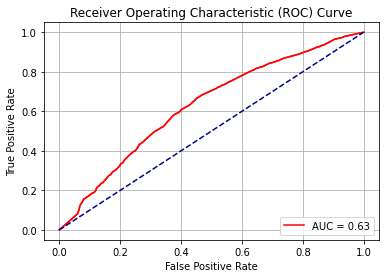

In [87]:
#Calculating Area Under the Curve with predict probapility:
fpr, tpr, thresholds = roc_curve(yTest, D_Tree.predict_proba(xTest)[:,1])

roc_auc = roc_auc_score(yTest, D_Tree.predict_proba(xTest)[:,1])
plt.plot(fpr, tpr, 'r', label = 'AUC = %0.2f' % roc_auc)
plt.plot(fpr, tpr, color='red', label='')
plt.plot([0, 1], [0, 1], color='darkblue', linestyle='--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc = 'lower right')
plt.grid()

##XGB

In [192]:
from xgboost import XGBClassifier
from sklearn.model_selection import cross_val_score, KFold
xgbc = XGBClassifier(max_depth=9, learning_rate=0.2, n_estimators=43,objective = 'binary:logistic', subsample=0.6, colsample_bytree=0.5, seed=0)
xgbc.fit(xTrain, yTrain)
scores = cross_val_score(xgbc, xTrain, yTrain, cv=5)
print("Mean cross-validation score: %.2f" % scores.mean())
kfold = KFold(n_splits=10, shuffle=True)
kf_cv_scores = cross_val_score(xgbc, xTrain, yTrain, cv=kfold )
print("K-fold CV average score: %.2f" % kf_cv_scores.mean())

Mean cross-validation score: 0.69
K-fold CV average score: 0.69


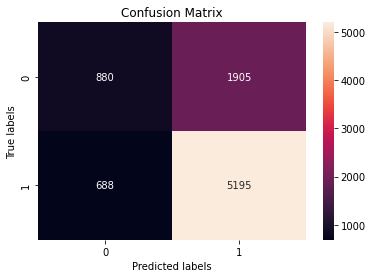

In [193]:
#Calculating Prediction
yPred = xgbc.predict(xTest)

#----------------------------------------------------
#Calculating Confusion Matrix
CM = confusion_matrix(yTest, yPred)

# drawing confusion matrix
ax= plt.subplot()
sns.heatmap(CM, annot=True, fmt='g', ax = ax);
ax.set_xlabel('Predicted labels');
ax.set_ylabel('True labels'); 
ax.set_title('Confusion Matrix');

In [194]:
#Calculating classification Report (precision, recall, f1-score, accuracy) on test set:  

ClassificationReport = classification_report(yTest, yPred)
print('Classification Report is : \n', ClassificationReport)

Classification Report is : 
               precision    recall  f1-score   support

           0       0.56      0.32      0.40      2785
           1       0.73      0.88      0.80      5883

    accuracy                           0.70      8668
   macro avg       0.65      0.60      0.60      8668
weighted avg       0.68      0.70      0.67      8668



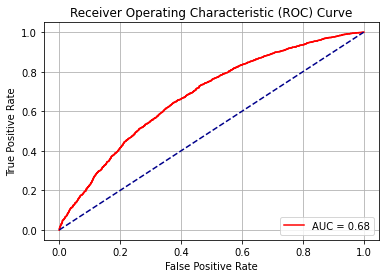

In [195]:
#Calculating Area Under the Curve with predict probapility:
fpr, tpr, thresholds = roc_curve(yTest, xgbc.predict_proba(xTest)[:,1])

roc_auc = roc_auc_score(yTest, xgbc.predict_proba(xTest)[:,1])
plt.plot(fpr, tpr, 'r', label = 'AUC = %0.2f' % roc_auc)
plt.plot(fpr, tpr, color='red', label='')
plt.plot([0, 1], [0, 1], color='darkblue', linestyle='--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc = 'lower right')
plt.grid()

In [191]:
%%time



# predicting
y_pred = Ada_.predict(xTest)

#Calculating classification Report. 
Report_ = classification_report(yTest, y_pred)
print('The Report is : \n', Report_)

The Report is : 
               precision    recall  f1-score   support

           0       0.56      0.37      0.44      2785
           1       0.74      0.86      0.80      5883

    accuracy                           0.70      8668
   macro avg       0.65      0.62      0.62      8668
weighted avg       0.68      0.70      0.69      8668

CPU times: user 2min 22s, sys: 2.35 s, total: 2min 24s
Wall time: 2min 26s


##AdaBoostClassifier

In [196]:
# create an object from our AdaBoostClassifier
Ada_ = AdaBoostClassifier(RandomForestClassifier(n_estimators = 43), algorithm="SAMME", n_estimators=43)

# fit the model
Ada_.fit(xTrain, yTrain)

AdaBoostClassifier(algorithm='SAMME',
                   base_estimator=RandomForestClassifier(n_estimators=43),
                   n_estimators=43)

In [198]:
#test the accuracy of model on training set
print('D_Tree Train Score is : ' , Ada_.score(xTrain, yTrain))

D_Tree Train Score is :  1.0


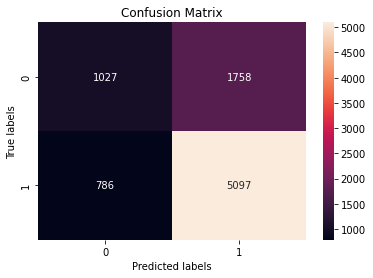

In [199]:
#Calculating Prediction
yPred = Ada_.predict(xTest)

#----------------------------------------------------
#Calculating Confusion Matrix
CM = confusion_matrix(yTest, yPred)

# drawing confusion matrix
ax= plt.subplot()
sns.heatmap(CM, annot=True, fmt='g', ax = ax);
ax.set_xlabel('Predicted labels');
ax.set_ylabel('True labels'); 
ax.set_title('Confusion Matrix');

In [200]:
#Calculating classification Report (precision, recall, f1-score, accuracy) on test set:  

ClassificationReport = classification_report(yTest, yPred)
print('Classification Report is : \n', ClassificationReport)

Classification Report is : 
               precision    recall  f1-score   support

           0       0.57      0.37      0.45      2785
           1       0.74      0.87      0.80      5883

    accuracy                           0.71      8668
   macro avg       0.66      0.62      0.62      8668
weighted avg       0.69      0.71      0.69      8668



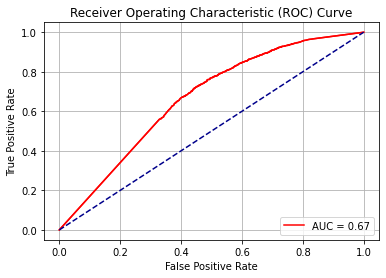

In [201]:
#Calculating Area Under the Curve with predict probapility:
fpr, tpr, thresholds = roc_curve(yTest, Ada_.predict_proba(xTest)[:,1])

roc_auc = roc_auc_score(yTest, Ada_.predict_proba(xTest)[:,1])
plt.plot(fpr, tpr, 'r', label = 'AUC = %0.2f' % roc_auc)
plt.plot(fpr, tpr, color='red', label='')
plt.plot([0, 1], [0, 1], color='darkblue', linestyle='--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc = 'lower right')
plt.grid()

#Task 7: Report your findings through the above experiments (in this markdown cell)

> From all these experiences I got all these There are a lot of missing values and there are a lot of duplicate values and I learned a lot of things to figure out how to deal with these problems Like:
* how to deal with missing data with different ways `[Listwise deletion, Pairwise deletion, simpleImputer, iterativeimputer, KNNImputer,....]`
* how to know if there is a missing values or not 
* how to know if there is a duplicated values or not
* how to know where are the missing values 
* known different mechanism for missing values
* how to using plots to know many things about missing values like how much , where, correlation

>I known if I want to use multiImputation and there is a categorical data what should i do 

> about this trials I figure out when I used plots i discoverd there were a lot of patterns and I used this patterns to know the mechanisms for missing values and know how to deal with it

>As is customary, there is no one-size-fits-all solution, and analyzing the final supervised learning approach, as we did above, is the best way to determine which method is most suited for your problem. If your supervised learning model is flexible enough and you have enough data, a simple imputation strategy can frequently enough, as the supervised model can often infer all of the information needed from the data.

>I used Many Models to see differents results and i found that the best two models i used are **`[adaboost, XGB]`** which both of them given me score around **`[71%, 70%]`** on test data

#Ref.

>Tutorial_1

> [Ref.](https://scikit-learn.org/stable/auto_examples/compose/plot_column_transformer_mixed_types.html)

>[REF.](https://machinelearningmastery.com/iterative-imputation-for-missing-values-in-machine-learning/)

> [REF.](https://www.kaggle.com/code/masumrumi/adaboost-with-titanic-dataset/notebook)

> [Imputation]( https://amueller.github.io/aml/01-ml-workflow/08-imputation.html)


>[REF.](https://campus.datacamp.com/courses/dealing-with-missing-data-in-python/the-problem-with-missing-data?ex=1)


>[REF.](https://towardsdatascience.com/how-to-handle-missing-data-8646b18db0d4f)

> [REF.](https://towardsdatascience.com/missing-data-cfd9dbfd11b7)

> [REF.](https://amueller.github.io/aml/01-ml-workflow/08-imputation.html#simpleimputer)

> [REF.](https://scikit-learn.org/stable/modules/impute.html#nearest-neighbors-imputation)

> [REF.](https://cjasn.asnjournals.org/content/early/2014/02/06/CJN.10141013/tab-figures-data?versioned=true)

> [REF.](https://www.kaggle.com/code/parulpandey/a-guide-to-handling-missing-values-in-python/notebook)

> [REF.](https://www.analyticsvidhya.com/blog/2021/06/data-cleaning-using-pandas/)
